<a href="https://colab.research.google.com/github/MikeIV2007/DS_HW_10/blob/main/DS_HW_10_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання модуль 10

**Частина 1**

В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.

На відміну від попереднього завдання вам пропонується створити згорткову нейромережу. Підберіть архітектуру мережі та навчіть її на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

# Version 1

4422102/4422102 [==============================] - 1s 0us/step
Epoch 1/50
235/235 [==============================] - 68s 276ms/step - loss: 0.7088 - accuracy: 0.7398 - val_loss: 0.5017 - val_accuracy: 0.8150
Epoch 2/50
235/235 [==============================] - 47s 199ms/step - loss: 0.4327 - accuracy: 0.8419 - val_loss: 0.4066 - val_accuracy: 0.8566
Epoch 3/50
235/235 [==============================] - 47s 200ms/step - loss: 0.3634 - accuracy: 0.8690 - val_loss: 0.3676 - val_accuracy: 0.8674
Epoch 4/50
235/235 [==============================] - 48s 205ms/step - loss: 0.3259 - accuracy: 0.8829 - val_loss: 0.3398 - val_accuracy: 0.8774
Epoch 5/50
235/235 [==============================] - 45s 193ms/step - loss: 0.3013 - accuracy: 0.8916 - val_loss: 0.3117 - val_accuracy: 0.8889
Epoch 6/50
235/235 [==============================] - 44s 188ms/step - loss: 0.2834 - accuracy: 0.8977 - val_loss: 0.3177 - val_accuracy: 0.8880
Epoch 7/50
235/235 [==============================] - 46s 196ms/ste

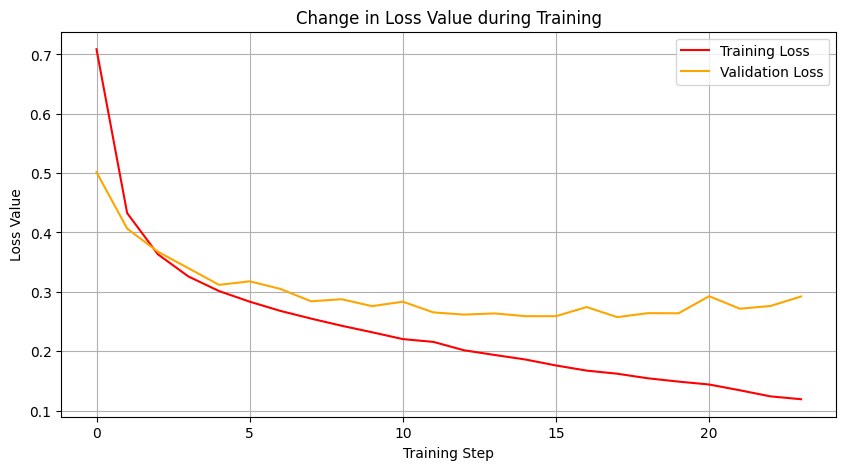

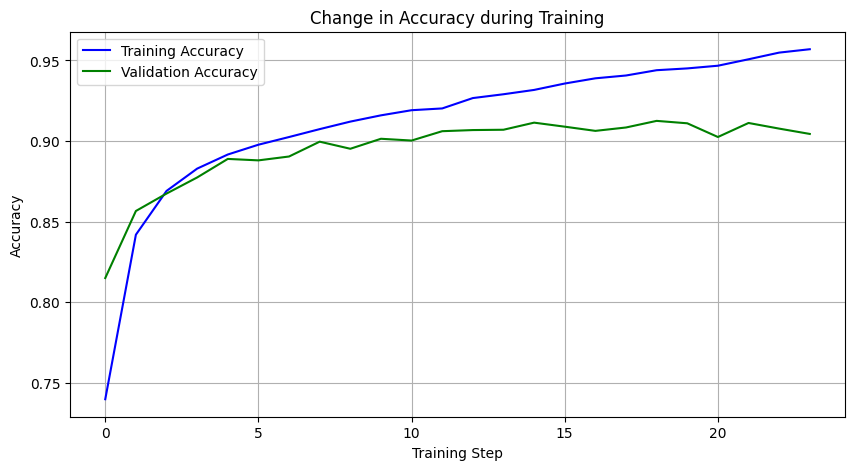

1875/1875 [==============================] - 21s 11ms/step - loss: 0.1394 - accuracy: 0.9495
Train accuracy: 0.949483335018158
313/313 [==============================] - 3s 9ms/step - loss: 0.2641 - accuracy: 0.9125
Test accuracy: 0.9125000238418579


In [ ]:
#version 01

import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
#from keras.layers import Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation = "relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3,3), activation = "relu"),

    layers.Flatten(),
    layers.Dense(64, activation = "relu"),
    layers.Dense(10, activation = "softmax")
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train the model and save history
history = model.fit(x_train, y_train, epochs=50, batch_size=256,
                    validation_data=(x_test, y_test), callbacks=[early_stopping])

# Extract loss and accuracy history
loss_history = history.history['loss']
accuracy_history = history.history['accuracy']
val_loss_history = history.history['val_loss']
val_accuracy_history = history.history['val_accuracy']

# Plot loss history
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Training Loss', color='red')
plt.plot(val_loss_history, label='Validation Loss', color='orange')
plt.xlabel('Training Step')
plt.ylabel('Loss Value')
plt.title('Change in Loss Value during Training')
plt.legend()
plt.grid(True)
plt.show()

# Plot accuracy history
plt.figure(figsize=(10, 5))
plt.plot(accuracy_history, label='Training Accuracy', color='blue')
plt.plot(val_accuracy_history, label='Validation Accuracy', color='green')
plt.xlabel('Training Step')
plt.ylabel('Accuracy')
plt.title('Change in Accuracy during Training')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model on the train set
test_loss, test_acc = model.evaluate(x_train, y_train)
print(f'Train accuracy: {test_acc}')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

# Version 2

Epoch 1/50
235/235 [==============================] - 51s 212ms/step - loss: 0.6573 - accuracy: 0.7628 - val_loss: 0.4450 - val_accuracy: 0.8361
Epoch 2/50
235/235 [==============================] - 50s 211ms/step - loss: 0.3777 - accuracy: 0.8640 - val_loss: 0.3573 - val_accuracy: 0.8692
Epoch 3/50
235/235 [==============================] - 52s 220ms/step - loss: 0.3209 - accuracy: 0.8837 - val_loss: 0.3215 - val_accuracy: 0.8863
Epoch 4/50
235/235 [==============================] - 51s 217ms/step - loss: 0.2859 - accuracy: 0.8967 - val_loss: 0.3039 - val_accuracy: 0.8911
Epoch 5/50
235/235 [==============================] - 50s 212ms/step - loss: 0.2642 - accuracy: 0.9032 - val_loss: 0.2817 - val_accuracy: 0.8980
Epoch 6/50
235/235 [==============================] - 69s 293ms/step - loss: 0.2462 - accuracy: 0.9094 - val_loss: 0.2702 - val_accuracy: 0.9006
Epoch 7/50
235/235 [==============================] - 50s 213ms/step - loss: 0.2287 - accuracy: 0.9165 - val_loss: 0.2833 - val_ac

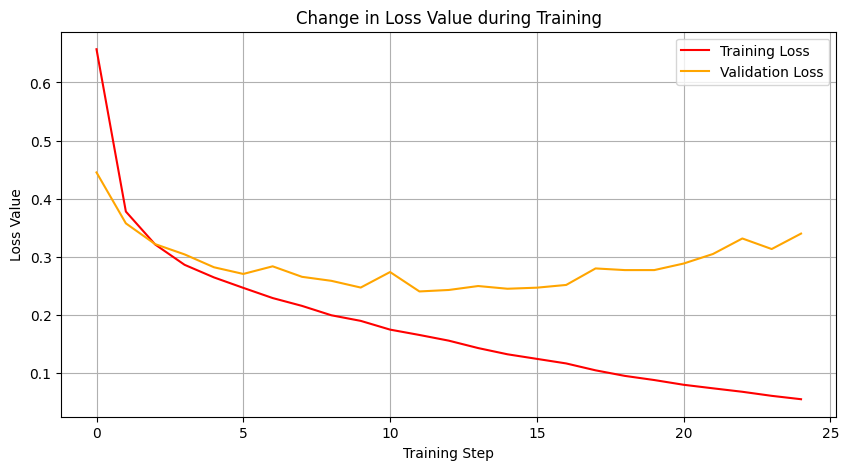

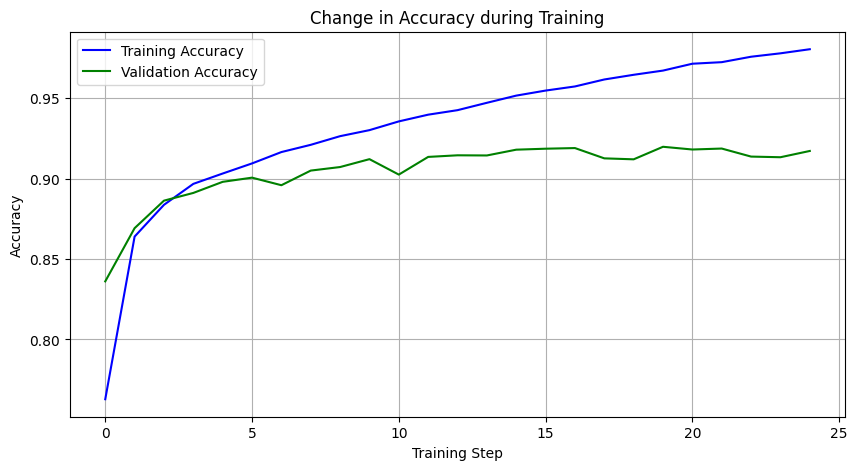

1875/1875 [==============================] - 19s 10ms/step - loss: 0.0670 - accuracy: 0.9768
Train accuracy: 0.9768499732017517
313/313 [==============================] - 3s 9ms/step - loss: 0.2768 - accuracy: 0.9198
Test accuracy: 0.9197999835014343


In [ ]:
#version 2 Quantyty of neurins in the Dens layer is changed from 64 to 128. Added an extra convolutional layer

import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the model
model = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation="relu"),

    Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train the model and save history
history = model.fit(x_train, y_train, epochs=50, batch_size=256,
                    validation_data=(x_test, y_test), callbacks=[early_stopping])

# Extract loss and accuracy history
loss_history = history.history['loss']
accuracy_history = history.history['accuracy']
val_loss_history = history.history['val_loss']
val_accuracy_history = history.history['val_accuracy']

# Plot loss history
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Training Loss', color='red')
plt.plot(val_loss_history, label='Validation Loss', color='orange')
plt.xlabel('Training Step')
plt.ylabel('Loss Value')
plt.title('Change in Loss Value during Training')
plt.legend()
plt.grid(True)
plt.show()

# Plot accuracy history
plt.figure(figsize=(10, 5))
plt.plot(accuracy_history, label='Training Accuracy', color='blue')
plt.plot(val_accuracy_history, label='Validation Accuracy', color='green')
plt.xlabel('Training Step')
plt.ylabel('Accuracy')
plt.title('Change in Accuracy during Training')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model on the train set
test_loss, test_acc = model.evaluate(x_train, y_train)
print(f'Train accuracy: {test_acc}')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')


1/1 [==============================] - 0s 133ms/step


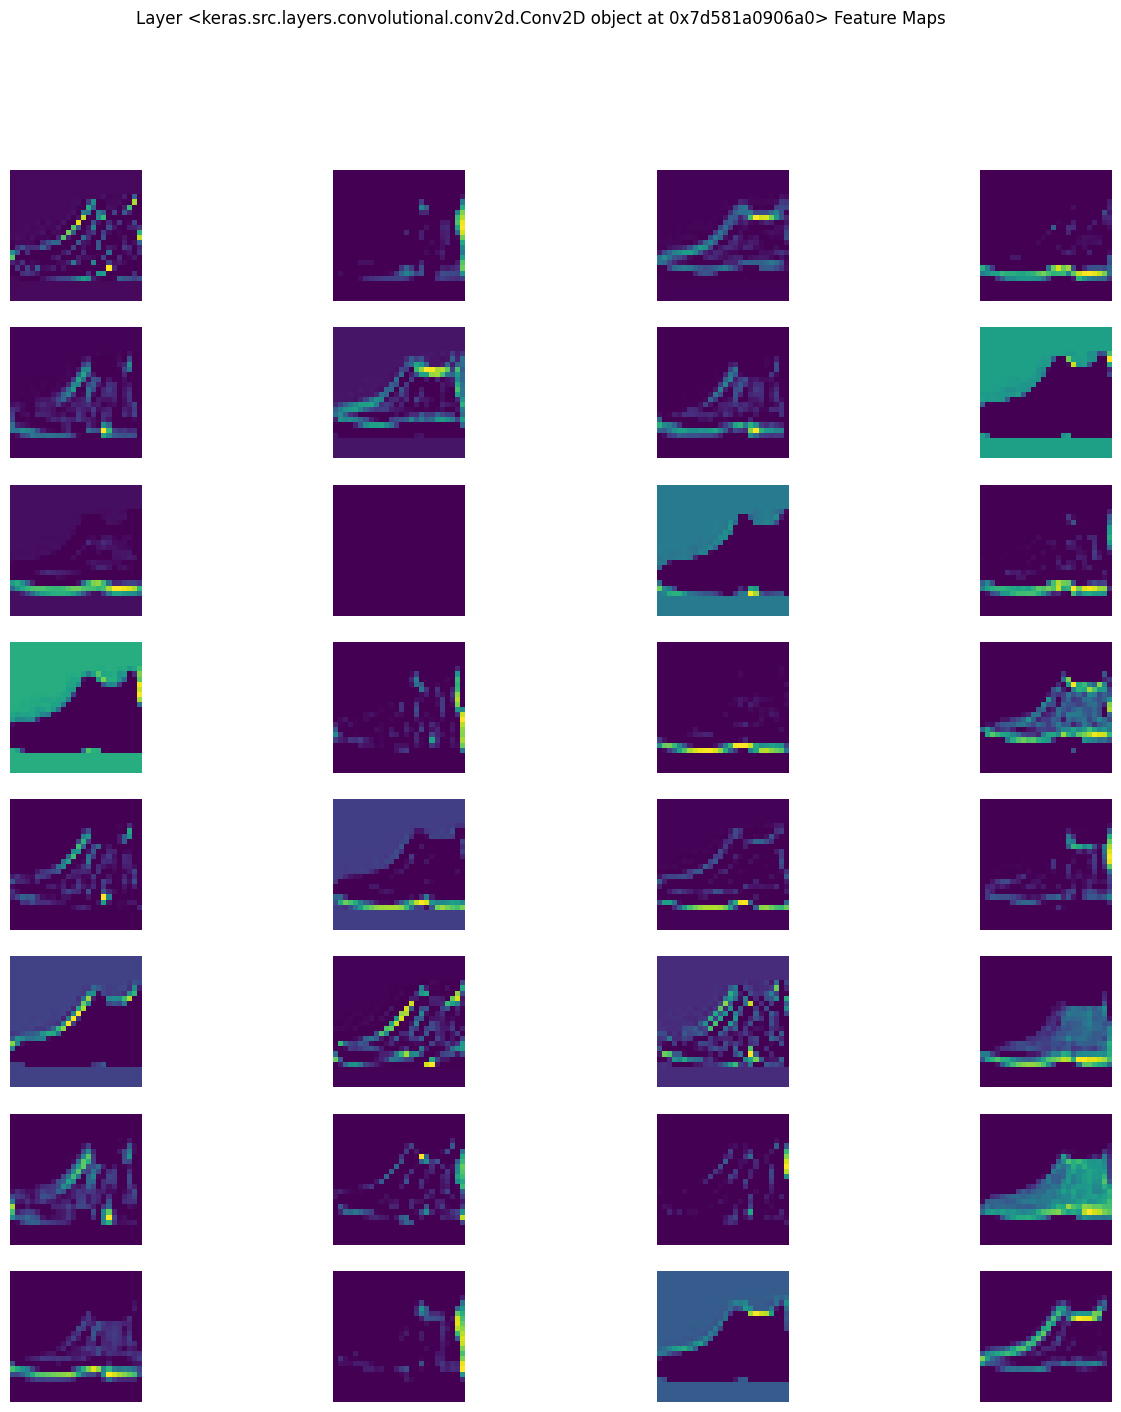

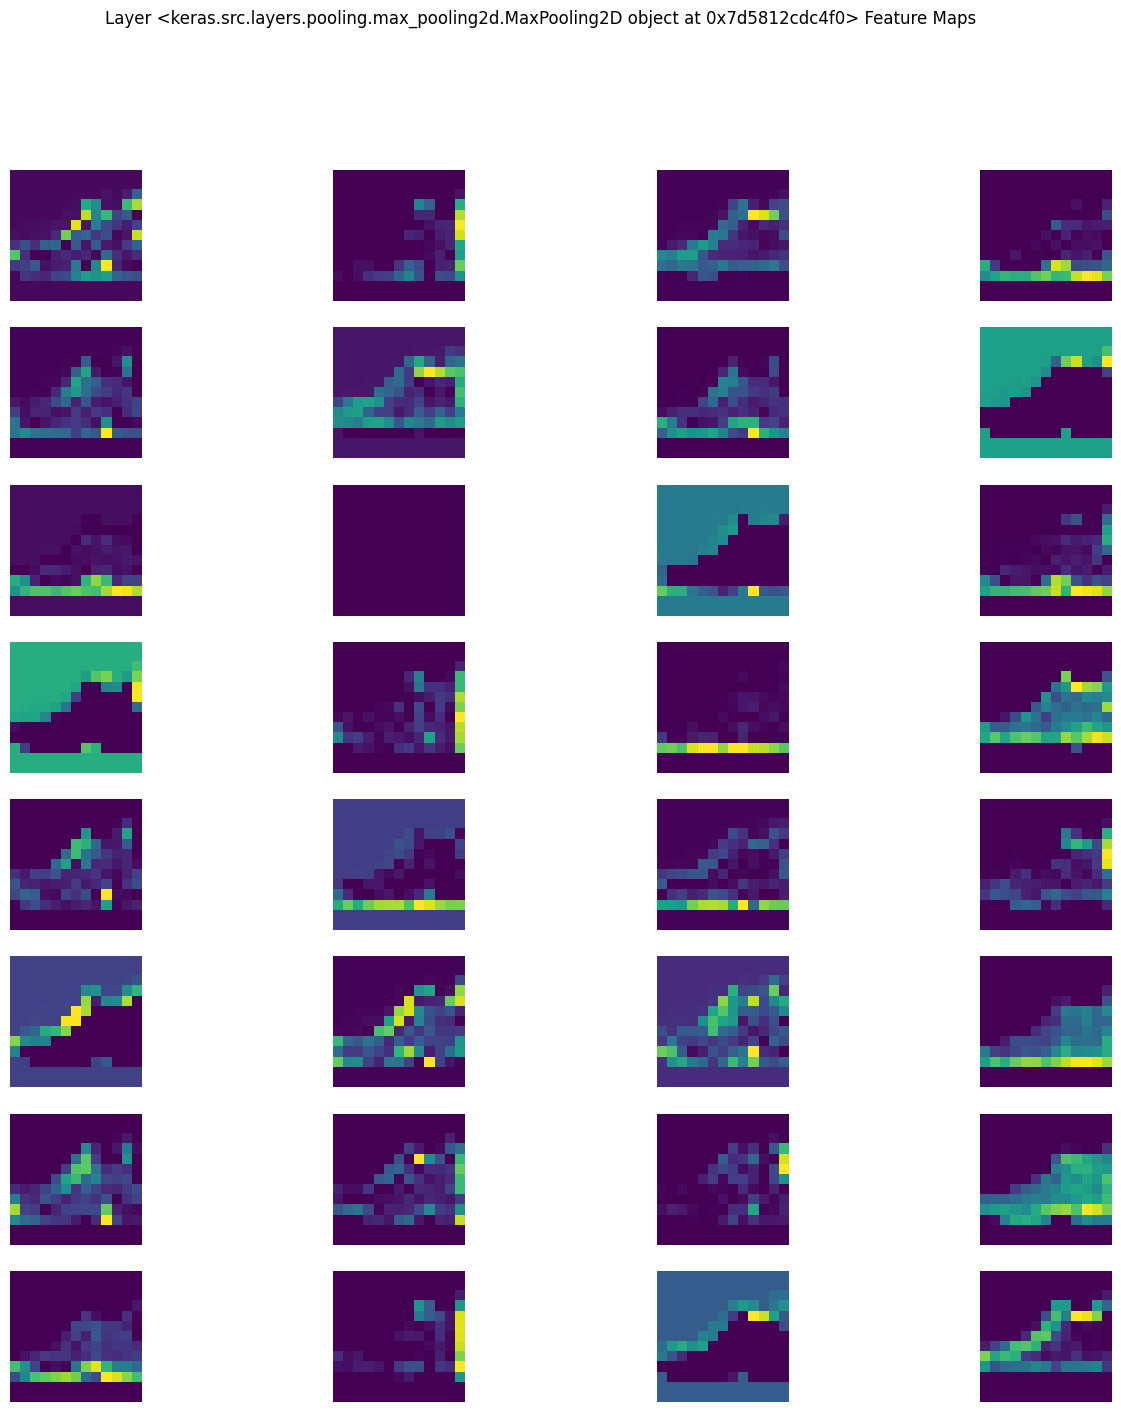

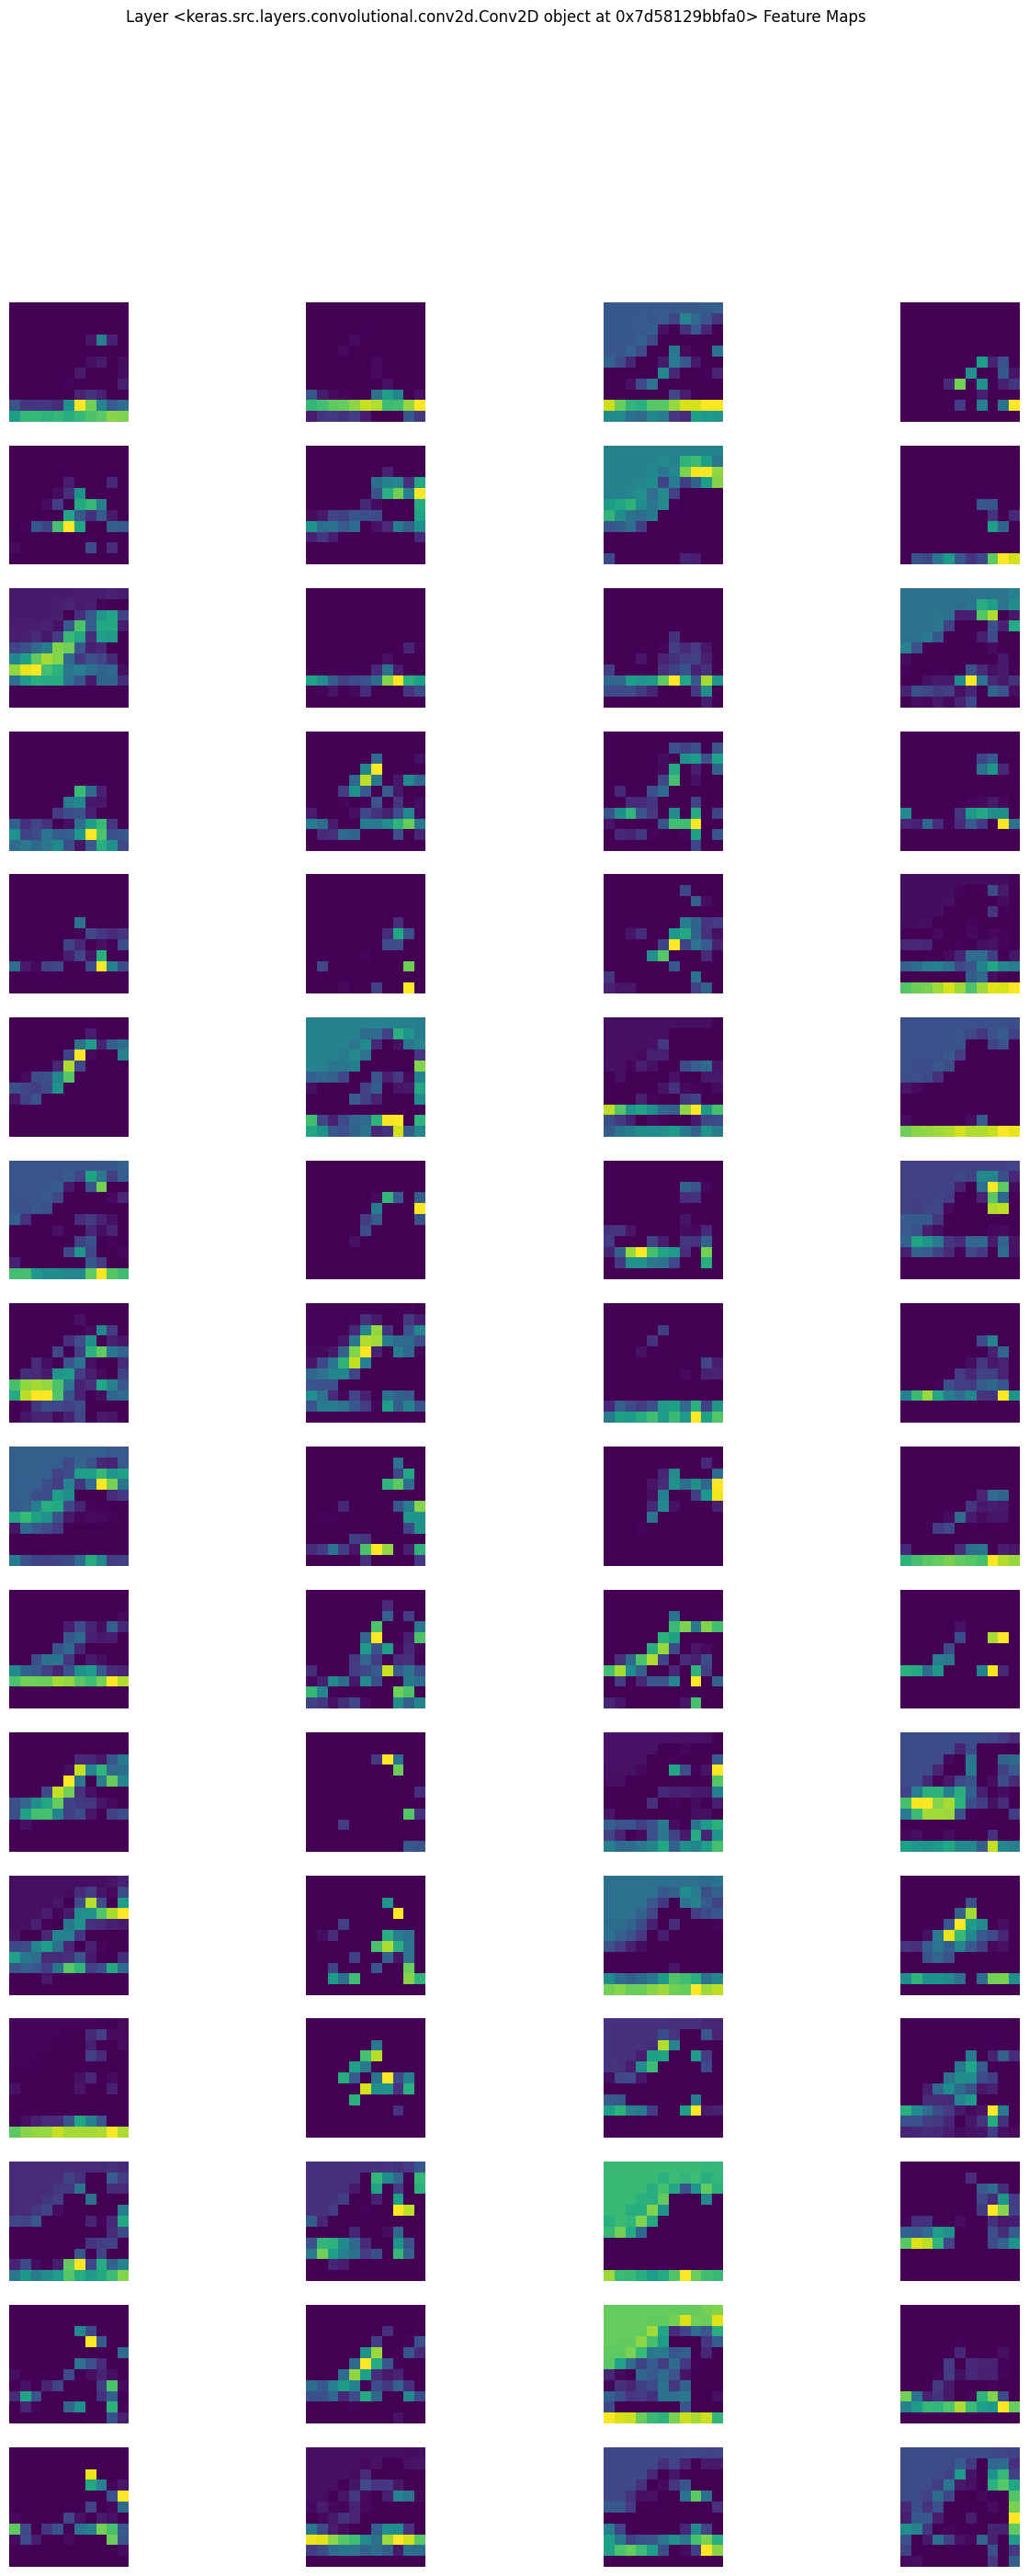

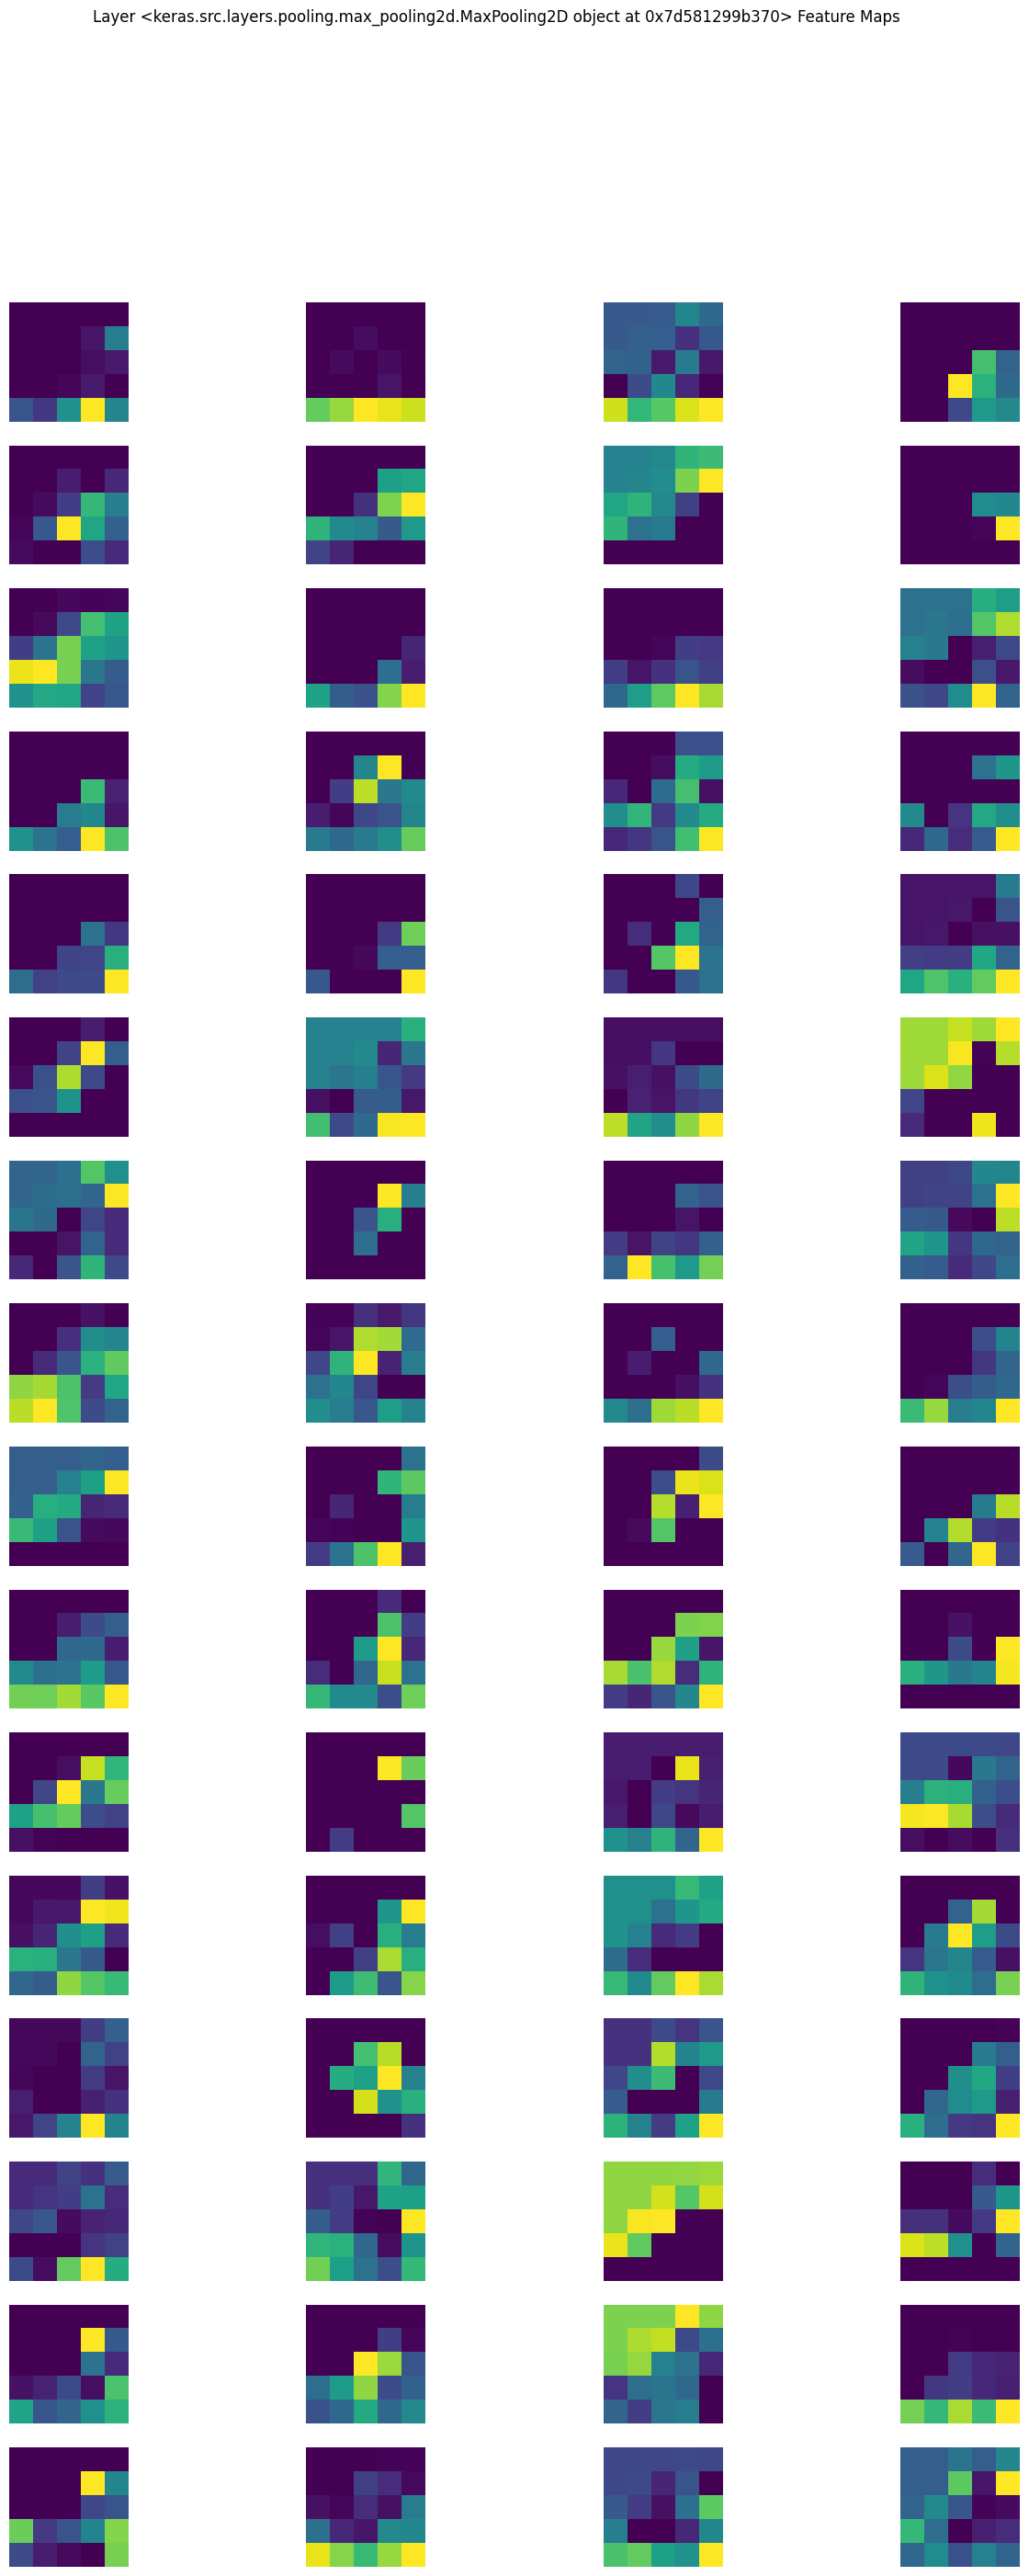

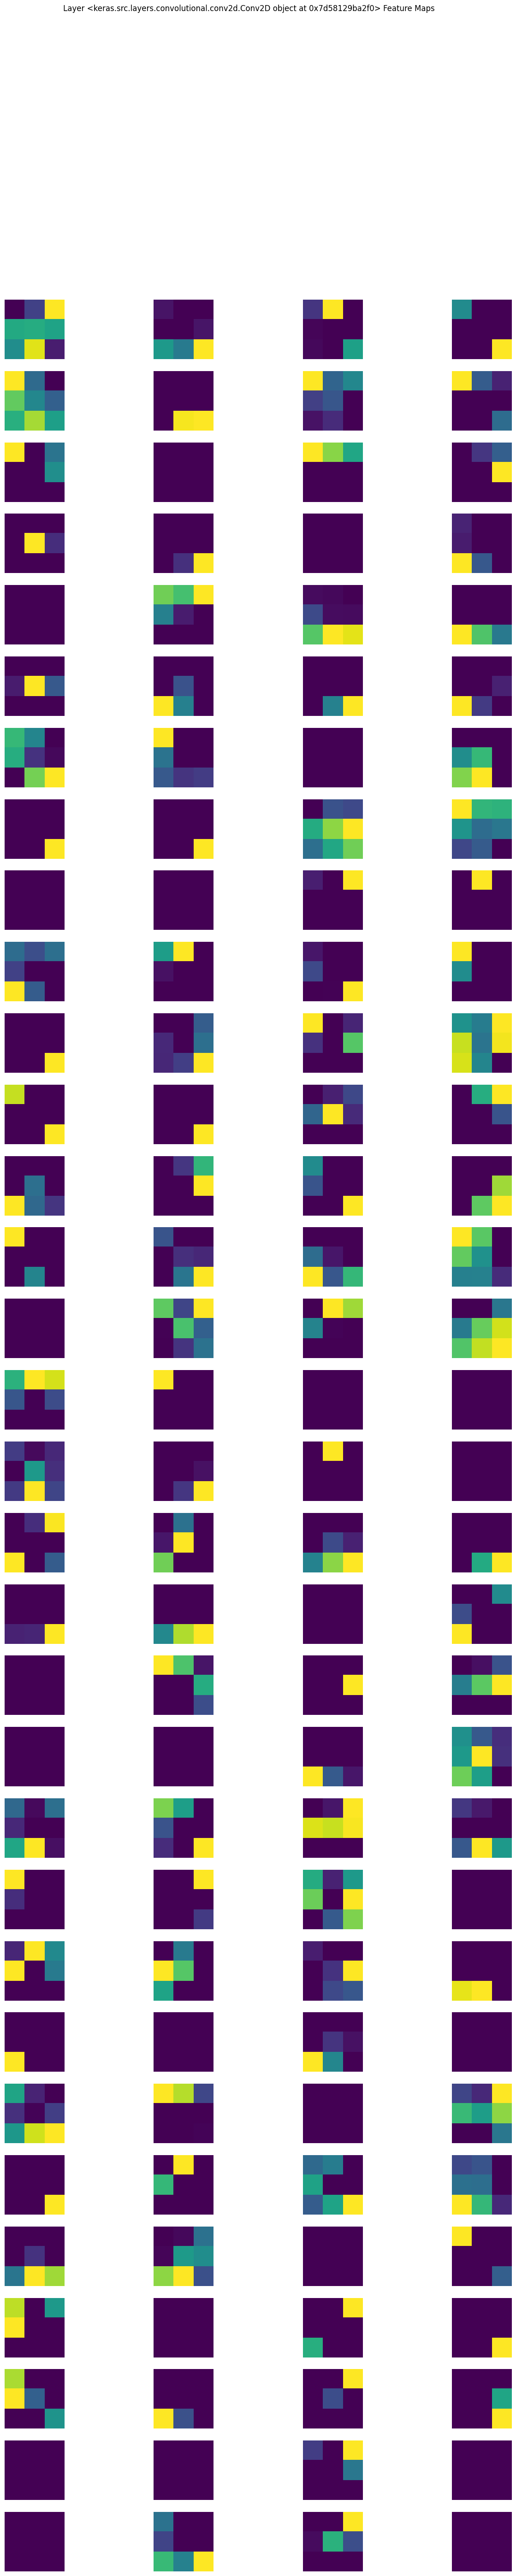

In [ ]:
from keras.models import Model

# Передача вхідного зображення через модель та отримання feature maps для кожного шару
activation_model = Model(inputs=model.input, outputs=[layer.output for layer in model.layers])
activations = activation_model.predict(x_test[0].reshape(1, 28, 28, 1))

# Візуалізація feature maps для кожного шару
for layer_index, layer_activation in enumerate(activations):
    if len(layer_activation.shape) == 4:  # Якщо це згортковий шар
        num_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]

        rows = num_features // 4  # Змінено з 8 на 4, оскільки менше фільтрів
        cols = 4

        plt.figure(figsize=(16, 2 * rows))
        for i in range(num_features):
            plt.subplot(rows, cols, i + 1)
            plt.imshow(layer_activation[0, :, :, i], cmap='viridis')
            plt.axis('off')
        plt.suptitle(f'Layer {activation_model.layers[layer_index+1]} Feature Maps')
        plt.show()

# ***Version 3***

Epoch 1/50
235/235 [==============================] - 60s 251ms/step - loss: 0.8003 - accuracy: 0.7079 - val_loss: 0.4837 - val_accuracy: 0.8184
Epoch 2/50
235/235 [==============================] - 49s 207ms/step - loss: 0.4813 - accuracy: 0.8242 - val_loss: 0.4000 - val_accuracy: 0.8570
Epoch 3/50
235/235 [==============================] - 49s 208ms/step - loss: 0.4079 - accuracy: 0.8544 - val_loss: 0.3522 - val_accuracy: 0.8710
Epoch 4/50
235/235 [==============================] - 50s 213ms/step - loss: 0.3615 - accuracy: 0.8695 - val_loss: 0.3253 - val_accuracy: 0.8808
Epoch 5/50
235/235 [==============================] - 50s 213ms/step - loss: 0.3361 - accuracy: 0.8809 - val_loss: 0.3249 - val_accuracy: 0.8798
Epoch 6/50
235/235 [==============================] - 53s 224ms/step - loss: 0.3107 - accuracy: 0.8890 - val_loss: 0.2952 - val_accuracy: 0.8926
Epoch 7/50
235/235 [==============================] - 51s 216ms/step - loss: 0.2945 - accuracy: 0.8958 - val_loss: 0.2860 - val_ac

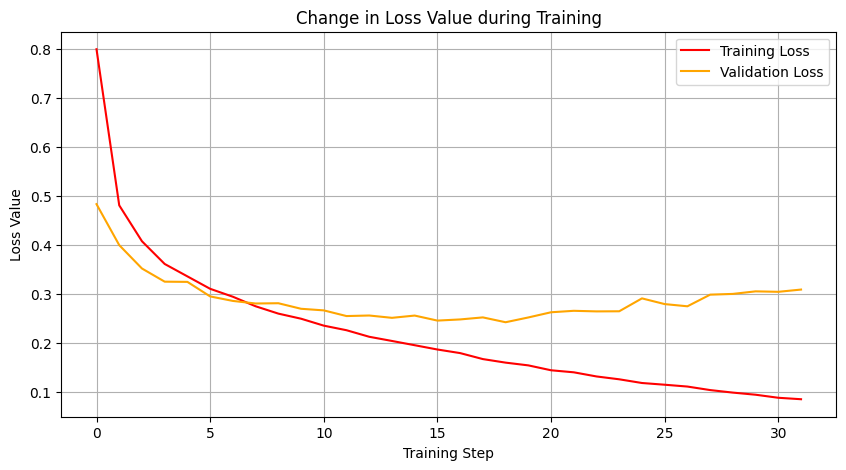

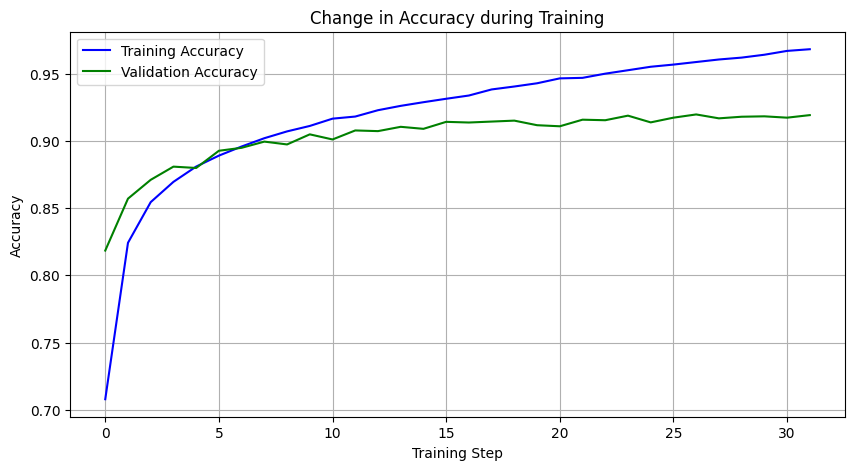

1875/1875 [==============================] - 19s 10ms/step - loss: 0.0765 - accuracy: 0.9712
Train accuracy: 0.9712333083152771
313/313 [==============================] - 3s 9ms/step - loss: 0.2750 - accuracy: 0.9196
Test accuracy: 0.9196000099182129


In [ ]:
#Version 3 Dropout layer is added

import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the model
model = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation="relu"),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout (0.5),
    Dense(10, activation="softmax")
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train the model and save history
history = model.fit(x_train, y_train, epochs=50, batch_size=256,
                    validation_data=(x_test, y_test), callbacks=[early_stopping])

# Extract loss and accuracy history
loss_history = history.history['loss']
accuracy_history = history.history['accuracy']
val_loss_history = history.history['val_loss']
val_accuracy_history = history.history['val_accuracy']

# Plot loss history
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Training Loss', color='red')
plt.plot(val_loss_history, label='Validation Loss', color='orange')
plt.xlabel('Training Step')
plt.ylabel('Loss Value')
plt.title('Change in Loss Value during Training')
plt.legend()
plt.grid(True)
plt.show()

# Plot accuracy history
plt.figure(figsize=(10, 5))
plt.plot(accuracy_history, label='Training Accuracy', color='blue')
plt.plot(val_accuracy_history, label='Validation Accuracy', color='green')
plt.xlabel('Training Step')
plt.ylabel('Accuracy')
plt.title('Change in Accuracy during Training')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model on the train set
test_loss, test_acc = model.evaluate(x_train, y_train)
print(f'Train accuracy: {test_acc}')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

1/1 [==============================] - 0s 109ms/step


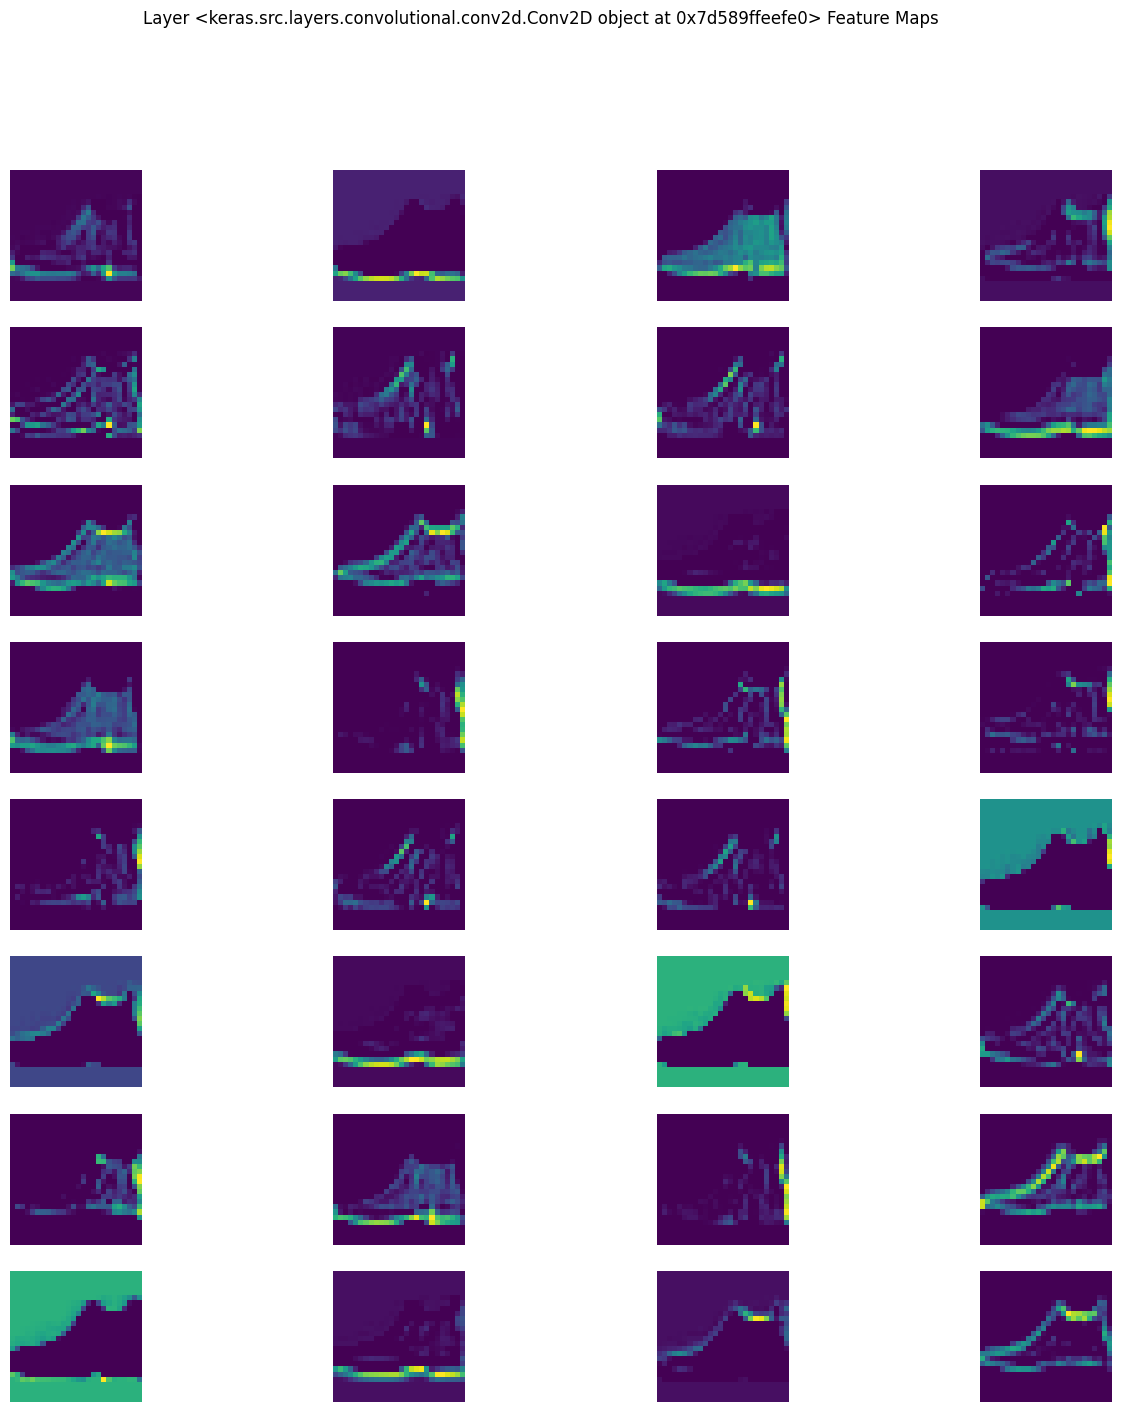

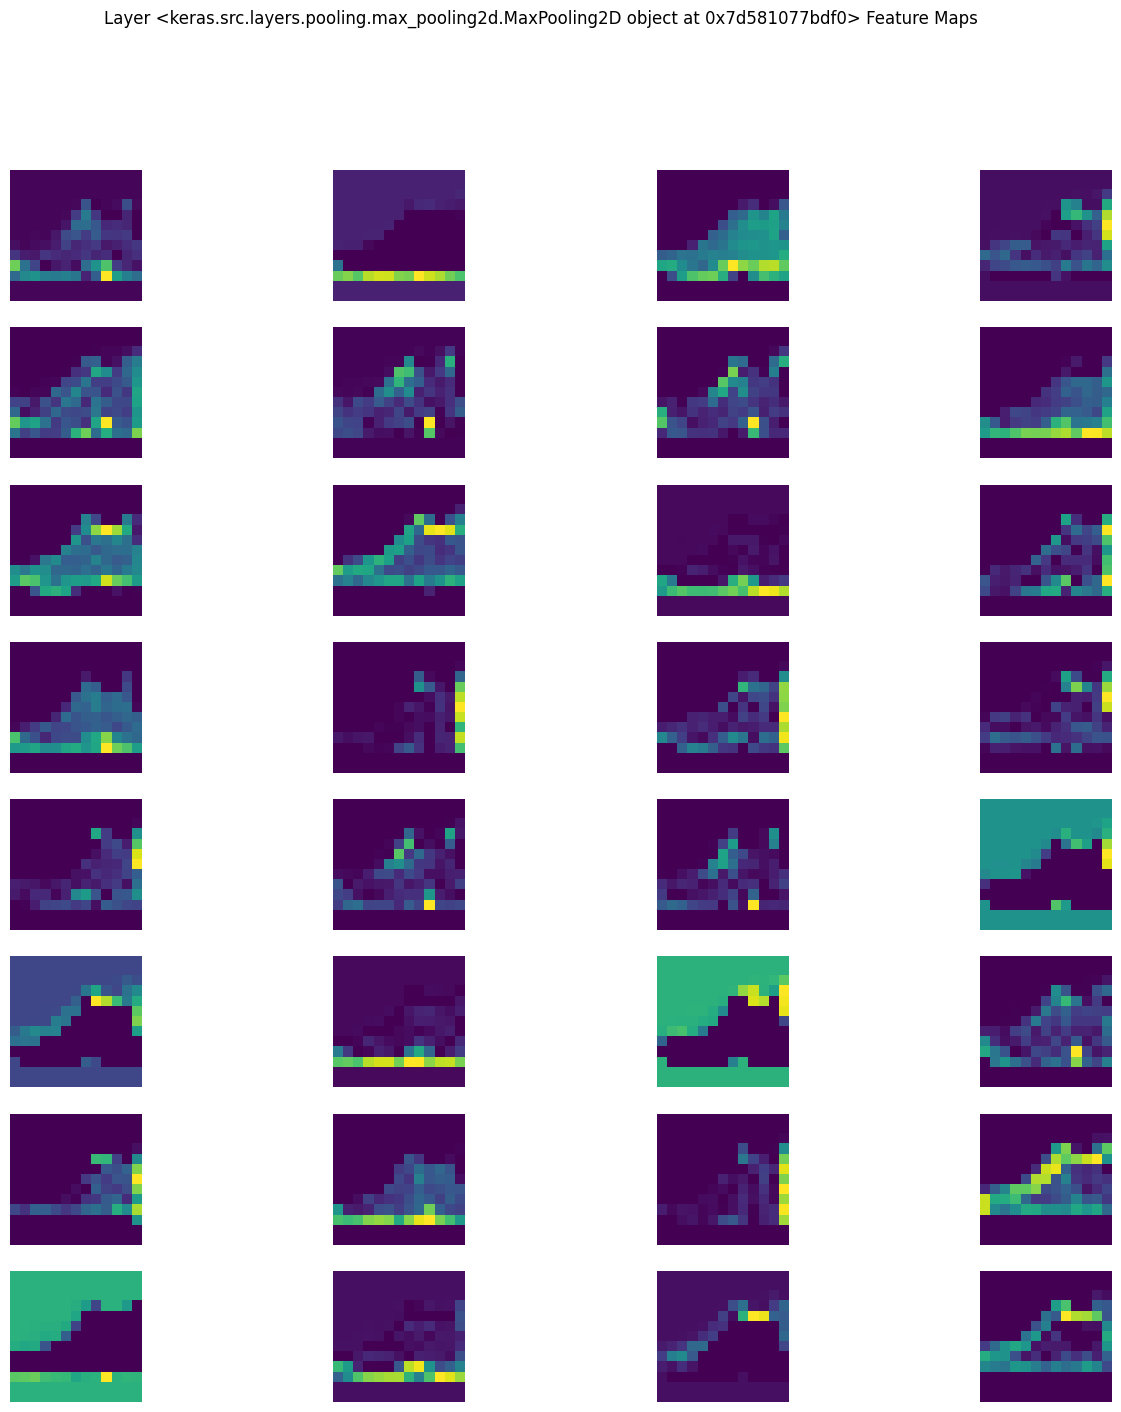

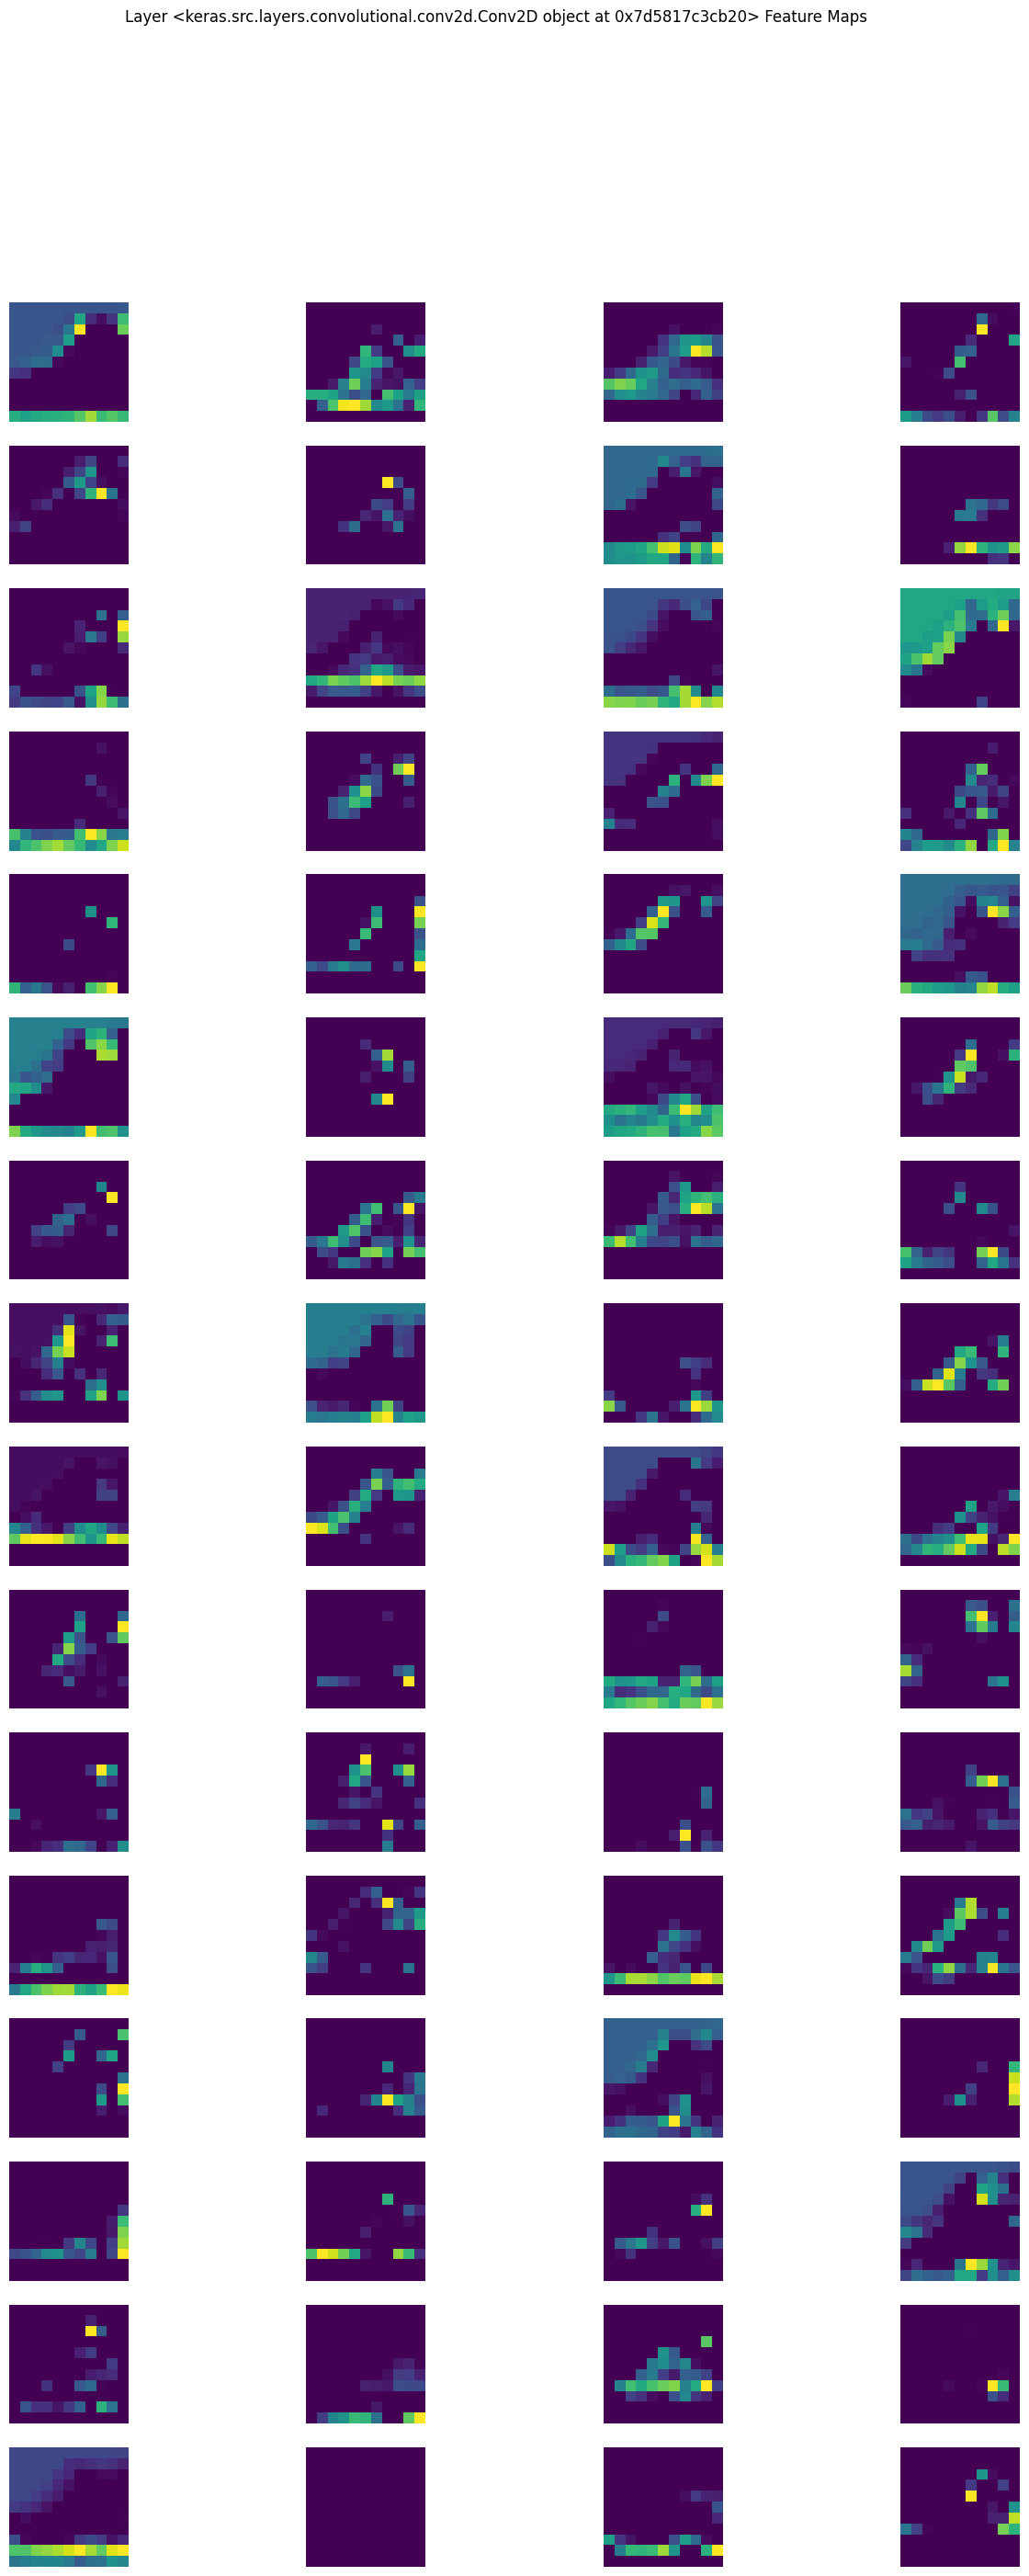

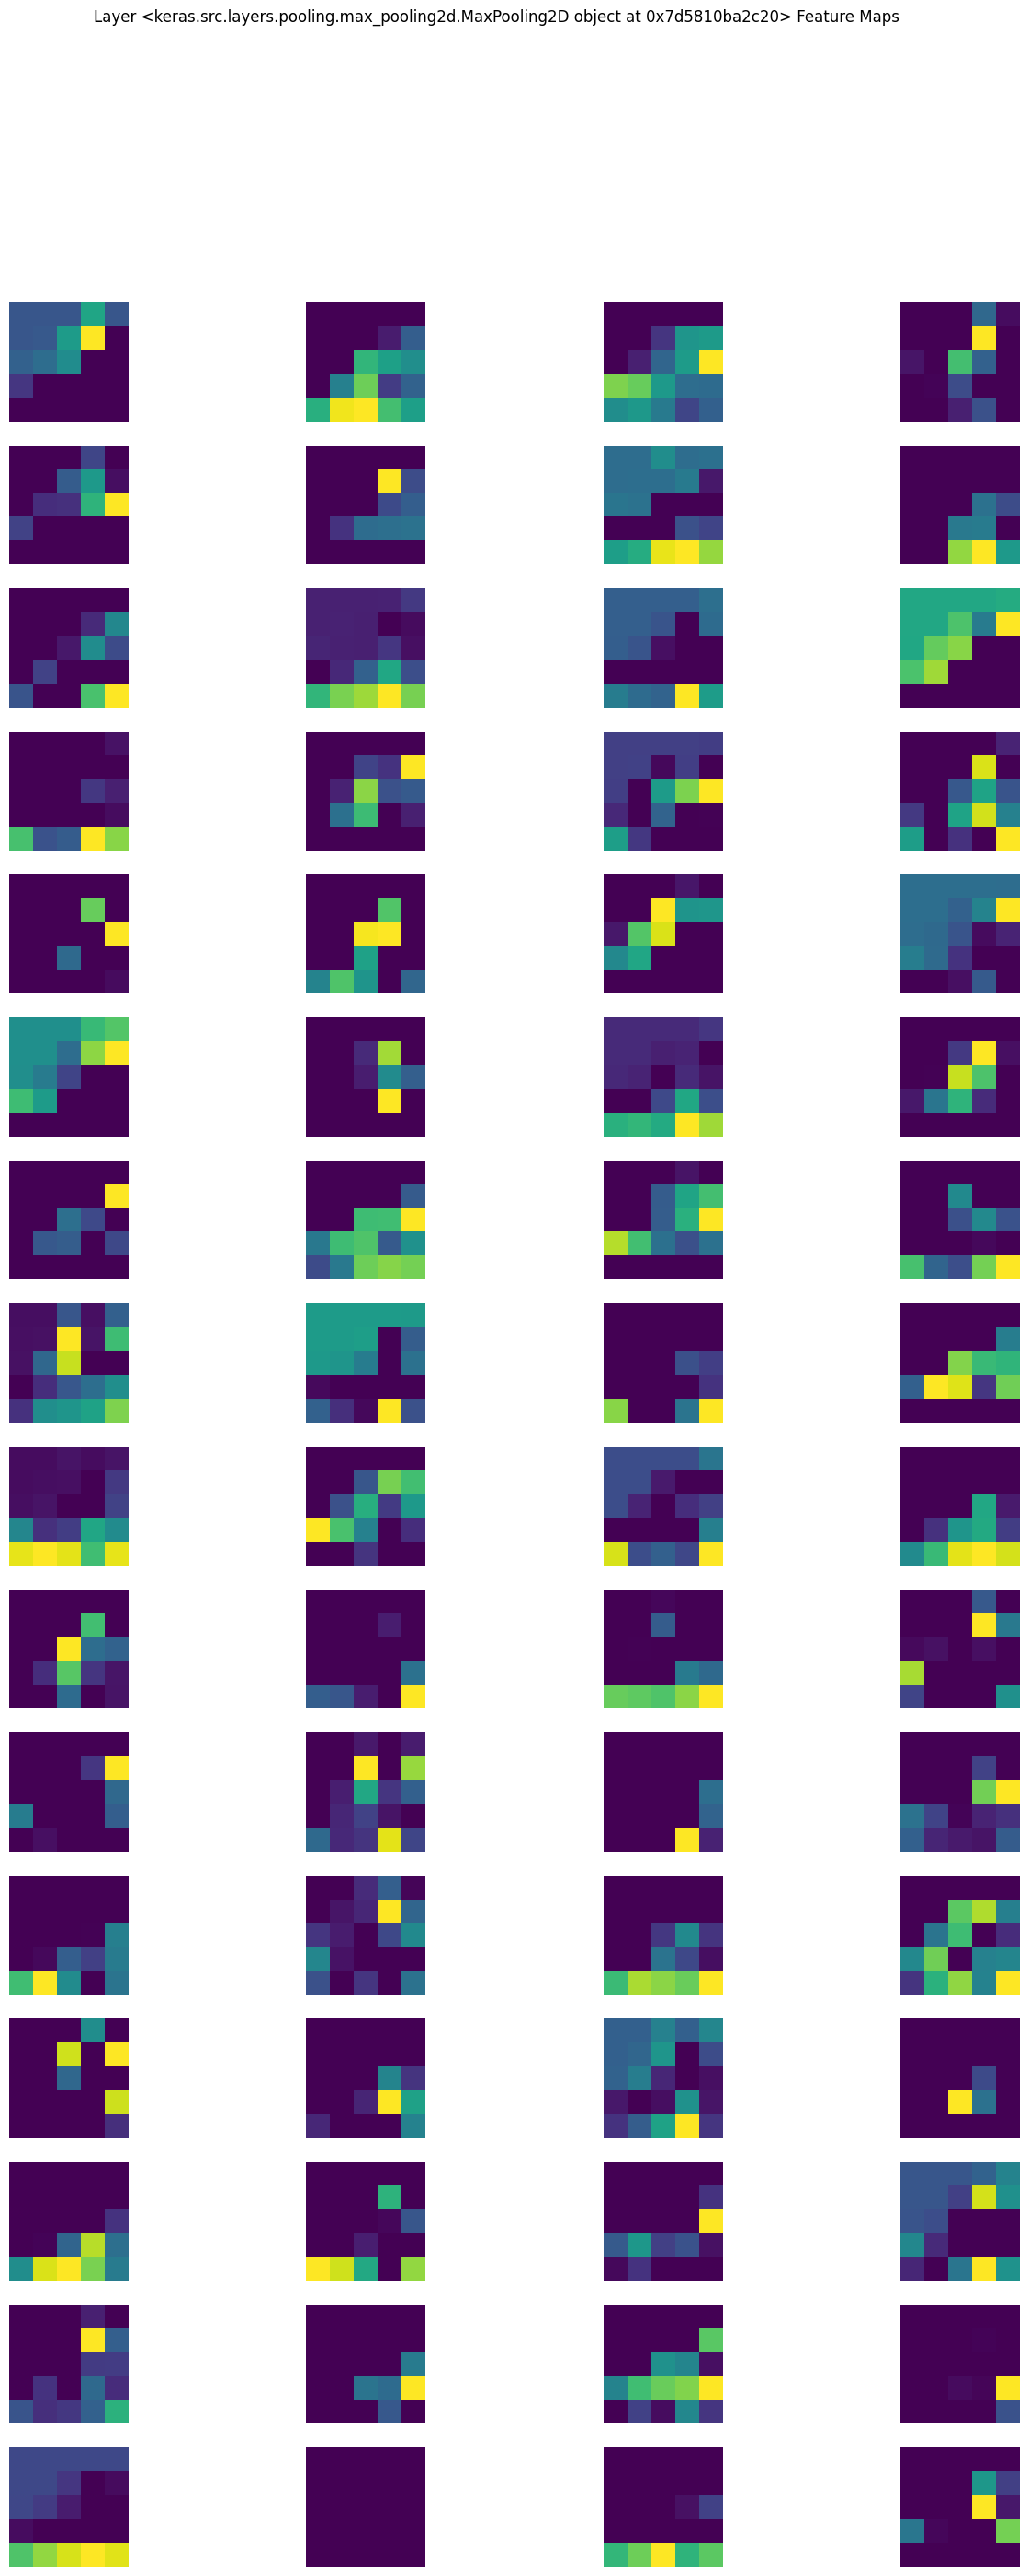

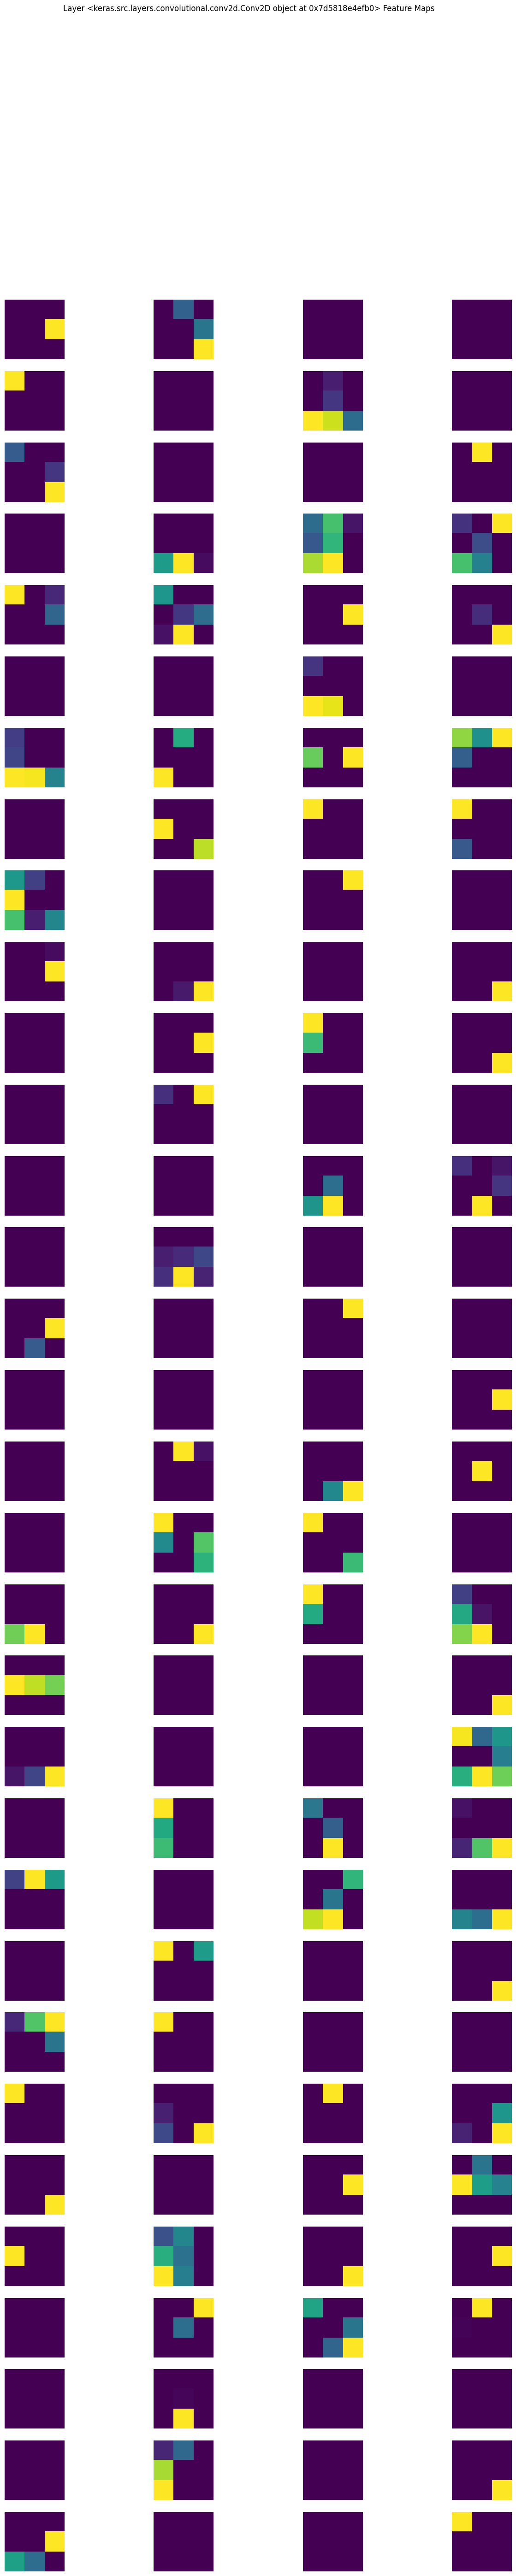

In [ ]:
from keras.models import Model

# Передача вхідного зображення через модель та отримання feature maps для кожного шару
activation_model = Model(inputs=model.input, outputs=[layer.output for layer in model.layers])
activations = activation_model.predict(x_test[0].reshape(1, 28, 28, 1))

# Візуалізація feature maps для кожного шару
for layer_index, layer_activation in enumerate(activations):
    if len(layer_activation.shape) == 4:  # Якщо це згортковий шар
        num_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]

        rows = num_features // 4  # Змінено з 8 на 4, оскільки менше фільтрів
        cols = 4

        plt.figure(figsize=(16, 2 * rows))
        for i in range(num_features):
            plt.subplot(rows, cols, i + 1)
            plt.imshow(layer_activation[0, :, :, i], cmap='viridis')
            plt.axis('off')
        plt.suptitle(f'Layer {activation_model.layers[layer_index+1]} Feature Maps')
        plt.show()

# Version 4

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 1600)              0         
                                                                 
 dense_13 (Dense)            (None, 128)              

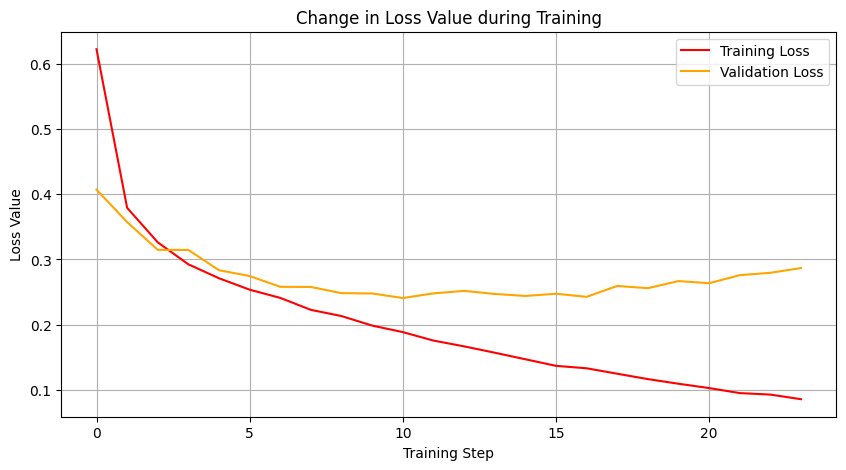

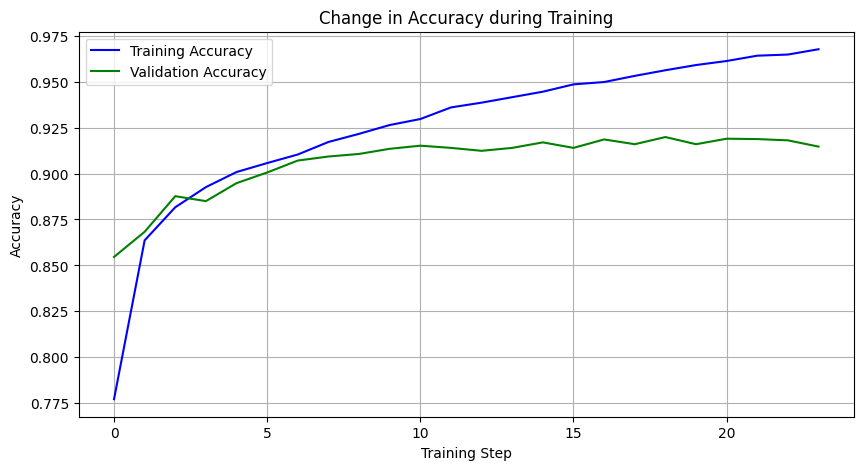

1875/1875 [==============================] - 39s 21ms/step - loss: 0.0857 - accuracy: 0.9692
Train accuracy: 0.9691500067710876
313/313 [==============================] - 7s 22ms/step - loss: 0.2559 - accuracy: 0.9199
Test accuracy: 0.9199000000953674


In [ ]:
#Version 4. Dropuot decreaesd from 0.5 to 0.2

import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the model
model = tf.keras.Sequential([
    Conv2D(128, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout (0.2),
    Dense(10, activation="softmax")
])
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train the model and save history
history = model.fit(x_train, y_train, epochs=50, batch_size=256,
                    validation_data=(x_test, y_test), callbacks=[early_stopping])

# Extract loss and accuracy history
loss_history = history.history['loss']
accuracy_history = history.history['accuracy']
val_loss_history = history.history['val_loss']
val_accuracy_history = history.history['val_accuracy']

# Plot loss history
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Training Loss', color='red')
plt.plot(val_loss_history, label='Validation Loss', color='orange')
plt.xlabel('Training Step')
plt.ylabel('Loss Value')
plt.title('Change in Loss Value during Training')
plt.legend()
plt.grid(True)
plt.show()

# Plot accuracy history
plt.figure(figsize=(10, 5))
plt.plot(accuracy_history, label='Training Accuracy', color='blue')
plt.plot(val_accuracy_history, label='Validation Accuracy', color='green')
plt.xlabel('Training Step')
plt.ylabel('Accuracy')
plt.title('Change in Accuracy during Training')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model on the train set
test_loss, test_acc = model.evaluate(x_train, y_train)
print(f'Train accuracy: {test_acc}')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

1/1 [==============================] - 0s 104ms/step


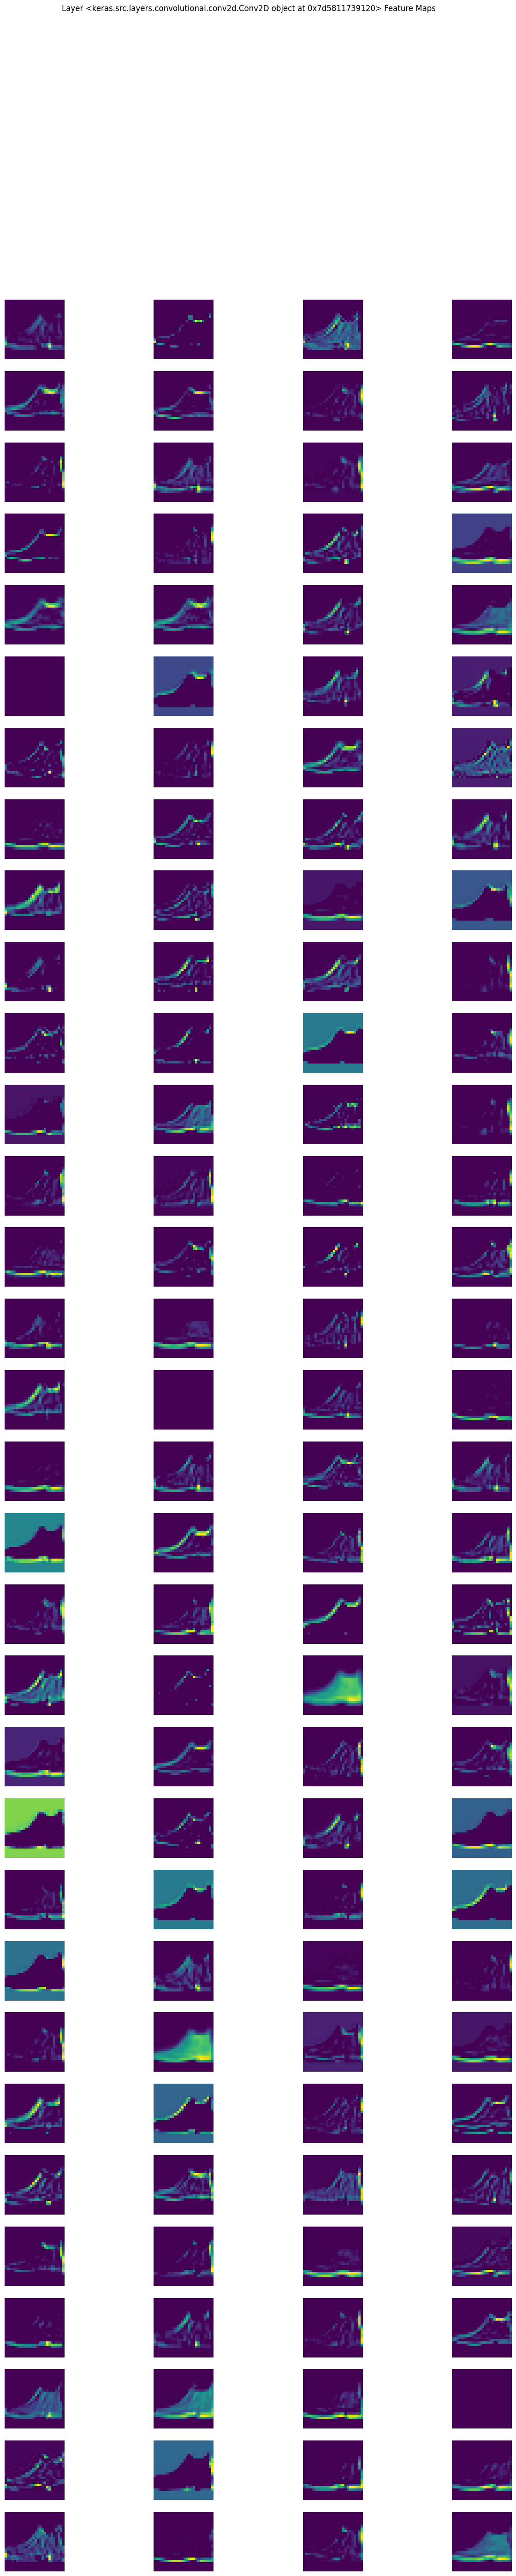

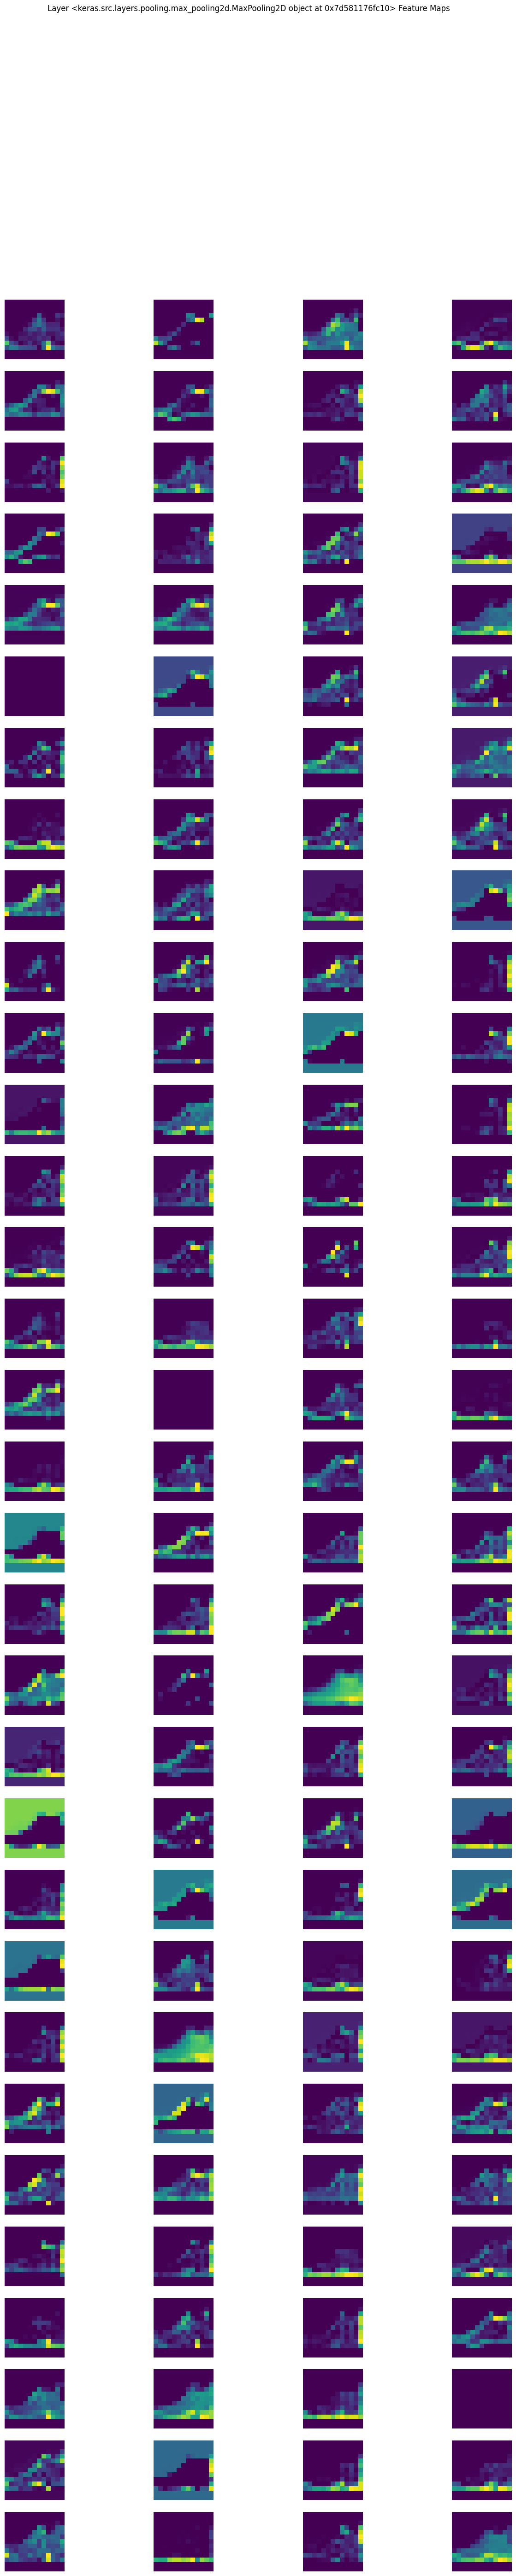

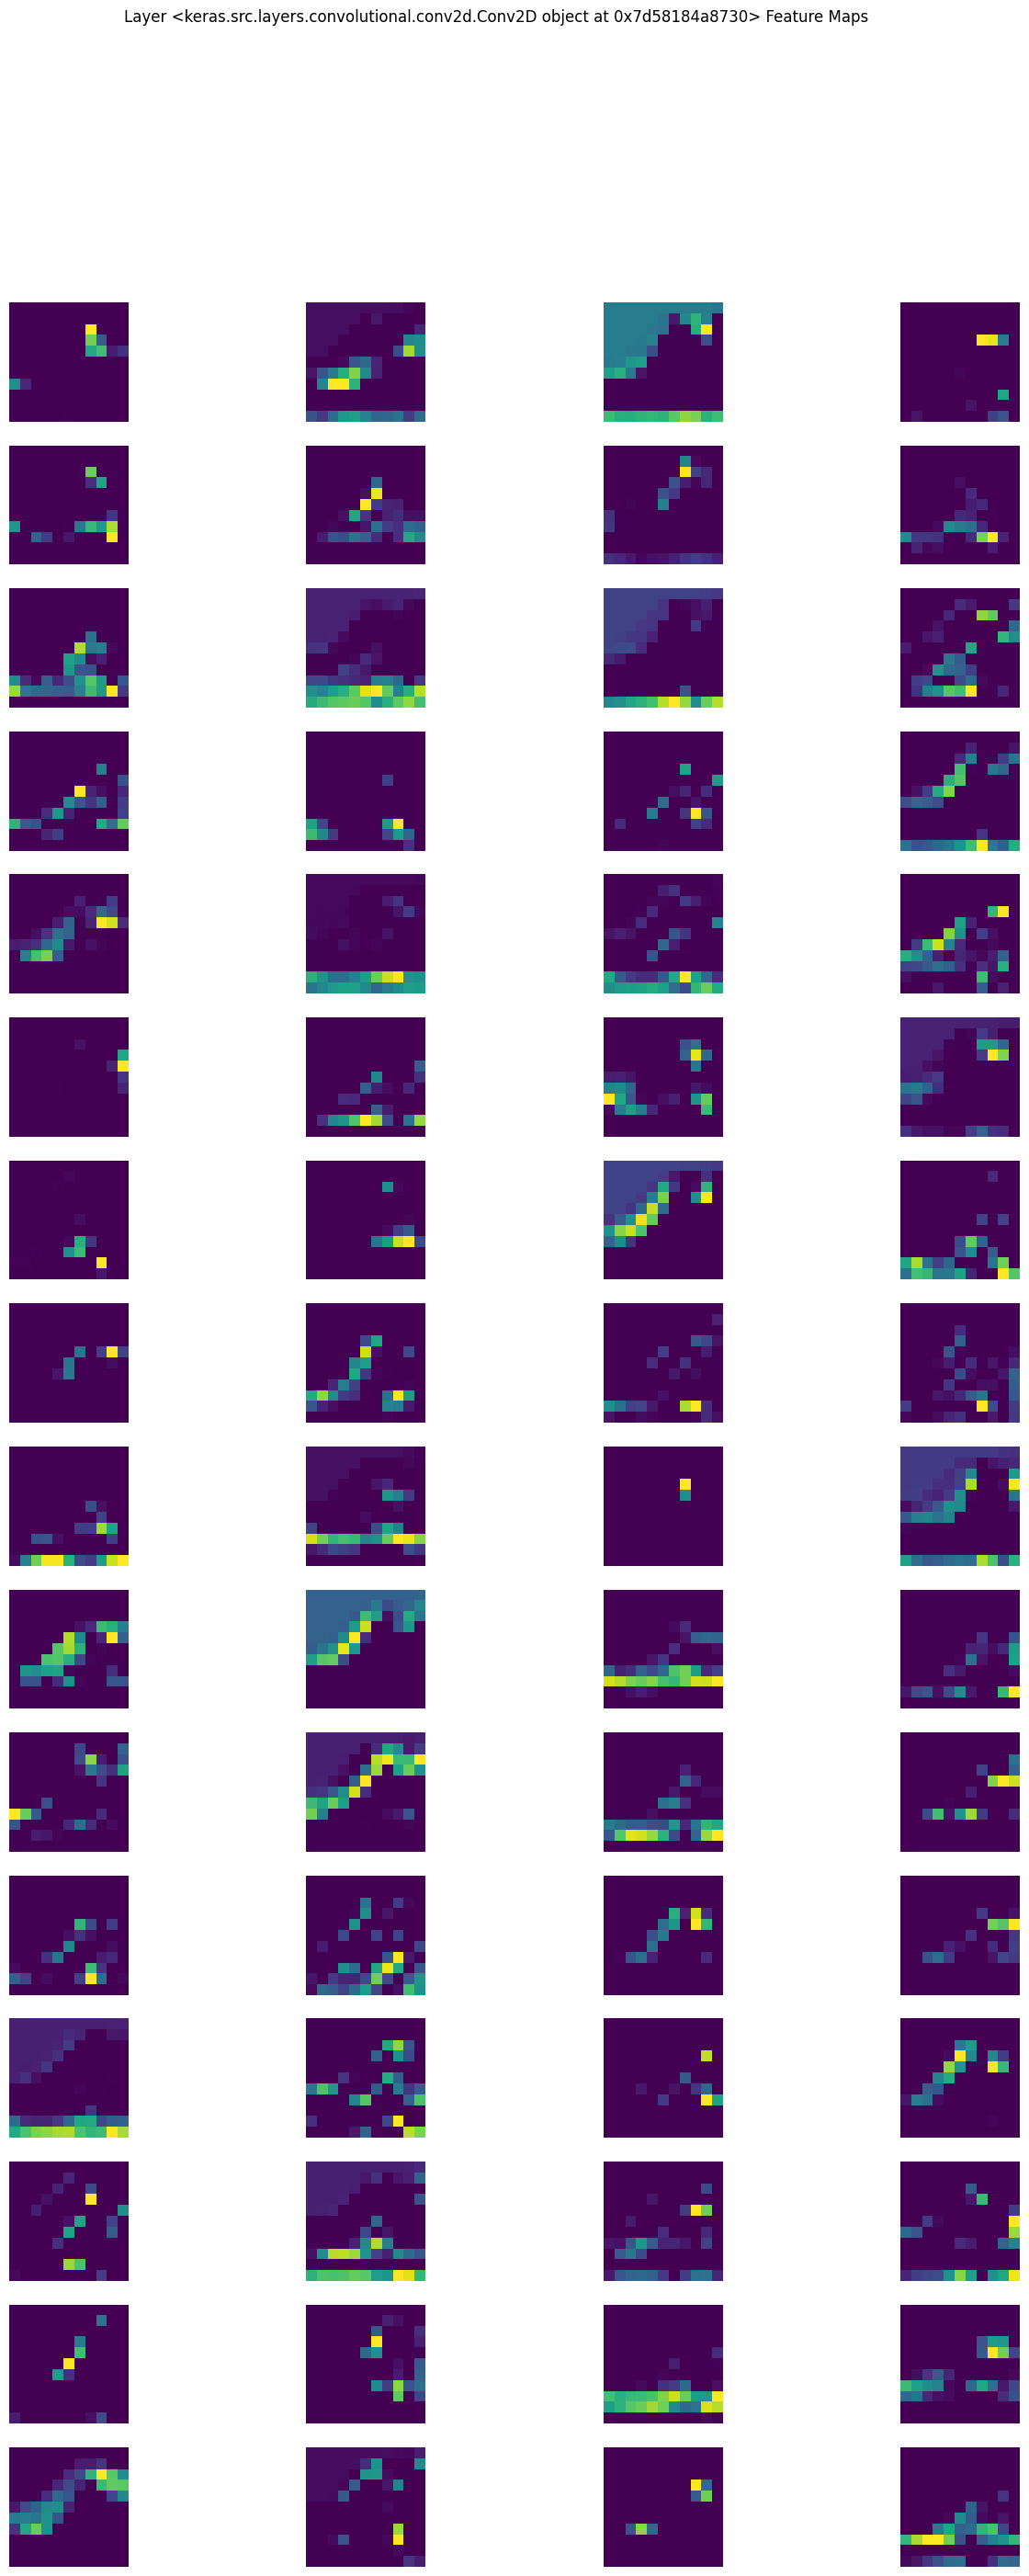

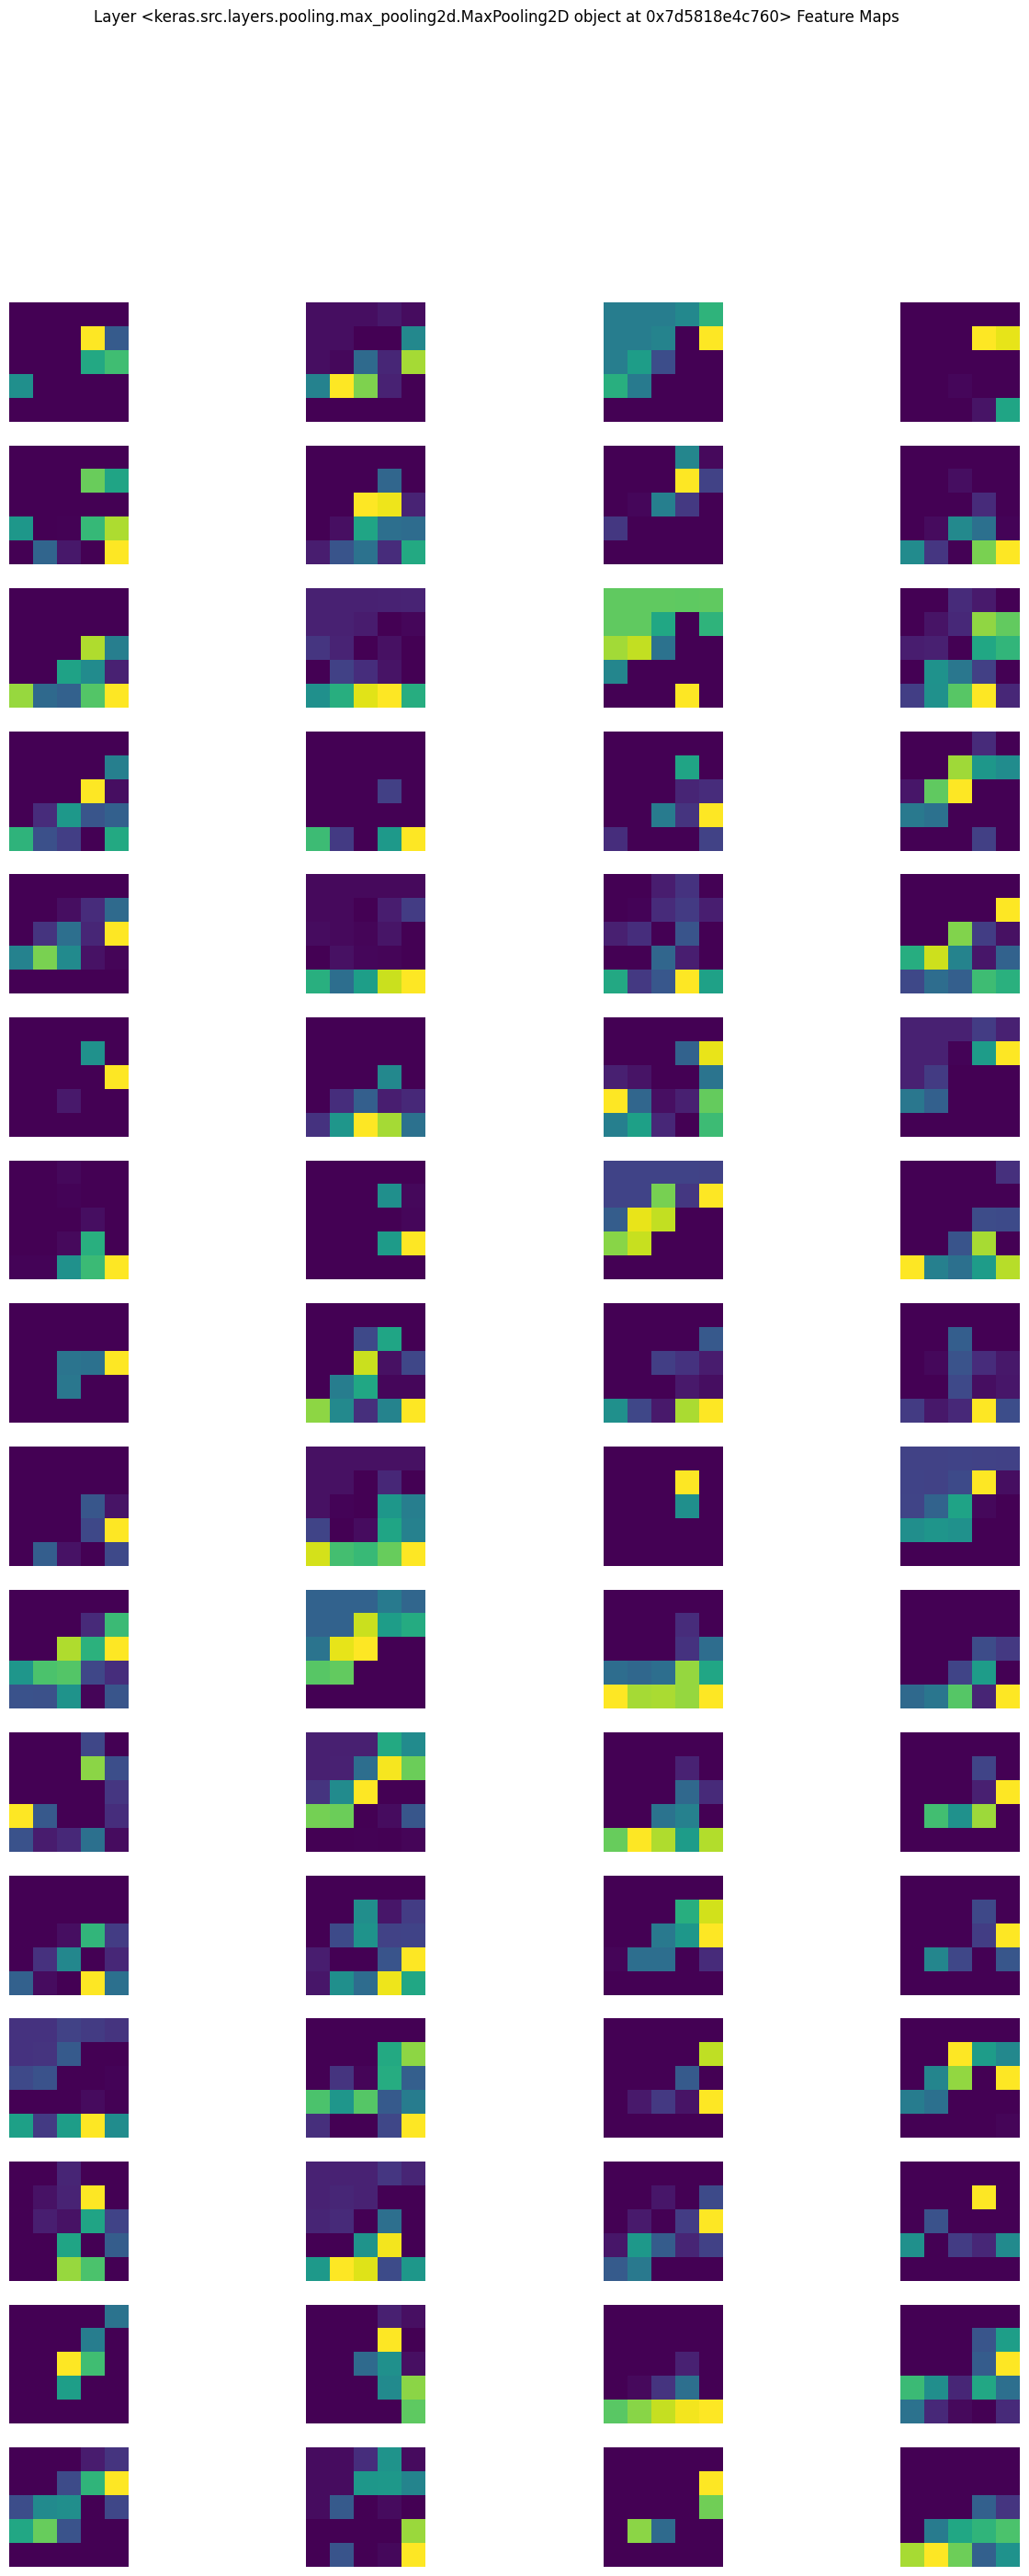

In [ ]:
from keras.models import Model

# Передача вхідного зображення через модель та отримання feature maps для кожного шару
activation_model = Model(inputs=model.input, outputs=[layer.output for layer in model.layers])
activations = activation_model.predict(x_test[0].reshape(1, 28, 28, 1))

# Візуалізація feature maps для кожного шару
for layer_index, layer_activation in enumerate(activations):
    if len(layer_activation.shape) == 4:  # Якщо це згортковий шар
        num_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]

        rows = num_features // 4  # Змінено з 8 на 4, оскільки менше фільтрів
        cols = 4

        plt.figure(figsize=(16, 2 * rows))
        for i in range(num_features):
            plt.subplot(rows, cols, i + 1)
            plt.imshow(layer_activation[0, :, :, i], cmap='viridis')
            plt.axis('off')
        plt.suptitle(f'Layer {activation_model.layers[layer_index+1]} Feature Maps')
        plt.show()

# **Versioin 5**

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 conv2d_15 (Conv2D)          (None, 24, 24, 64)        73792     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 12, 12, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 9216)              0         
                                                                 
 dense_15 (Dense)            (None, 128)               1179776   
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                      

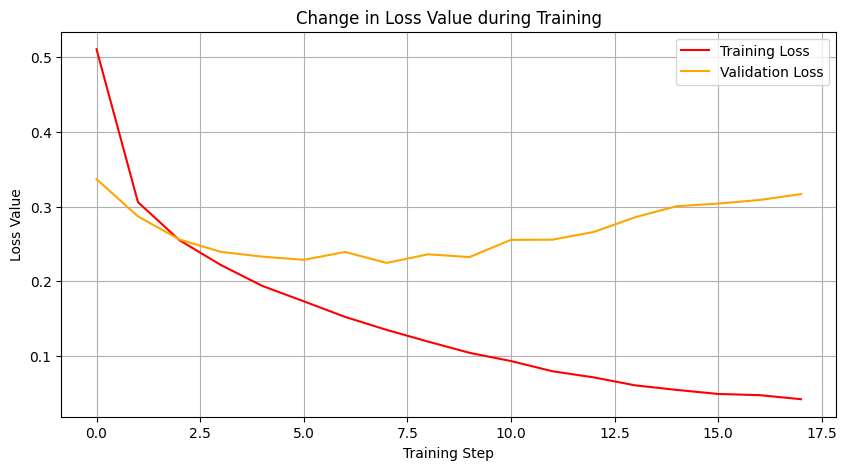

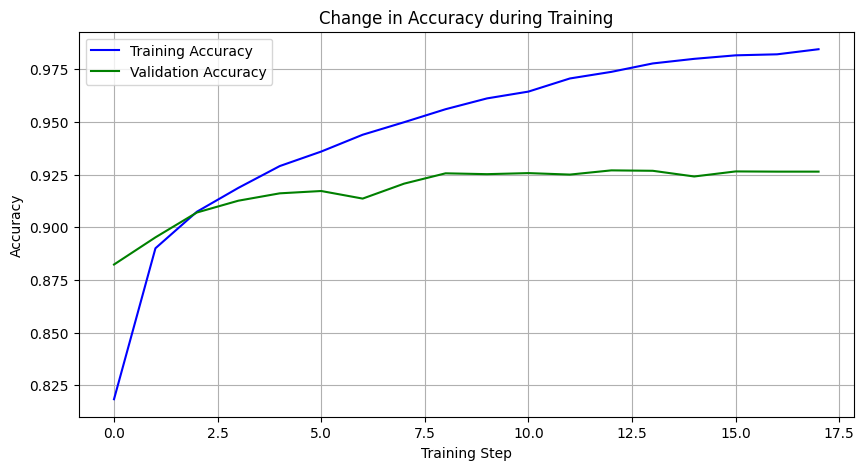

1875/1875 [==============================] - 115s 61ms/step - loss: 0.0370 - accuracy: 0.9882
Train accuracy: 0.988183319568634
313/313 [==============================] - 19s 61ms/step - loss: 0.2660 - accuracy: 0.9270
Test accuracy: 0.9269999861717224


In [ ]:
#version 5. Extra Conv2D layer is removed

import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the model
model = tf.keras.Sequential([
    Conv2D(128, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    #MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation="relu"),  # Increased the number of neurons
    Dropout (0.2),
    Dense(10, activation="softmax")
])
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train the model and save history
history = model.fit(x_train, y_train, epochs=50, batch_size=256,
                    validation_data=(x_test, y_test), callbacks=[early_stopping])

# Extract loss and accuracy history
loss_history = history.history['loss']
accuracy_history = history.history['accuracy']
val_loss_history = history.history['val_loss']
val_accuracy_history = history.history['val_accuracy']

# Plot loss history
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Training Loss', color='red')
plt.plot(val_loss_history, label='Validation Loss', color='orange')
plt.xlabel('Training Step')
plt.ylabel('Loss Value')
plt.title('Change in Loss Value during Training')
plt.legend()
plt.grid(True)
plt.show()

# Plot accuracy history
plt.figure(figsize=(10, 5))
plt.plot(accuracy_history, label='Training Accuracy', color='blue')
plt.plot(val_accuracy_history, label='Validation Accuracy', color='green')
plt.xlabel('Training Step')
plt.ylabel('Accuracy')
plt.title('Change in Accuracy during Training')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model on the train set
test_loss, test_acc = model.evaluate(x_train, y_train)
print(f'Train accuracy: {test_acc}')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')